In [3]:
#Importing libraries
import math as mt
from random import randint
from numpy import random
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import seaborn as sns


In [4]:
N= int(input("Enter the number of nodes in one dimension: "))


Enter the number of nodes in one dimension: 10


# Defining Ising Class:

In [5]:

##In this class, each state Matrix of spins, considered as an object


class Ising:
  def __init__(self,S):
    
    self.S = S
    N = len(self.S)
    


#_____________________________________________________________________________________________________________________________

  def Neighbors(self,S,i,j):
        if i not in [0,N-1] and j not in [0,N-1]:
            return([[i-1 , j], [i+1,j] , [i, j+1], [i, j-1]])
            
        
        
        if (i==0) and  (j==0):
            return( [[N-1,j] ,[i, N-1]  ,[i+1,j] ,[i, j+1]] )
            
        
        if i==0 and j==N-1 :

            return( [[i,0] ,[N-1, j] , [i+1,j] ,[i, j-1]])     
            
        
        if i==0 and j not in [N-1,0]:
            return([[i,j+1] ,[i, j-1] ,[i+1,j] ,[N-1, j]] )       
            

                
                
        if i==N-1 and j==0 :
           
            return([[i,N-1] , [0,j] ,[i,j+1],[i-1, j]])
            
            
        if  i==N-1 and j==N-1 :
            return([[i,0] ,[0, j] ,[i-1,j] ,[i, j-1]])
            
            
        if i==N-1 and j not in [N-1,0] :
            return([[i,j+1] ,[i, j-1] ,[i-1,j] ,[0, j]])        

                
        if j == 0 and i not in [0,N-1]:
            return([[i,N-1] ,[i, j+1] ,[i-1,j] ,[i+1, j]])
            
            
                
        if j==N-1 and i not in   [0,N-1]:
            return([[i,0] ,[i+1, j] ,[i-1,j] ,[i, j-1]])
            





#________________________________________________________________________________________________________________________





# finding the size of up (1) or down (-1) domains.


  def DomSize(self,S, spinSign ):
        

        #determining the set of (-1 OR +1) spin's sites
     T =[]
     for i in range(len(S)):
       for j in range(len(S)):
         if S[i,j] == spinSign :
           T.append([i,j])


#__________ main code in order to find clusters
     size=[]
     while True:
        
        if T ==[]:
          break


        else:
                

                # I is the cluster Indicator (for each cluster)

                I= T[0]
                
                #g=[]
                #g.append(I)
                


                #Size of -1 OR +1  spins before omitting recent cluster spins:

                s1=len(T)
                T.remove(I)
                
                # Z is the Neighbors of Neighbors...
                Z=[]
                Z = [v for v in self.Neighbors(S,I[0],I[1]) if v in T]

                while True:
                          
                          if Z ==[]:

                            # when there is not any neighbors, the cluster is over and we are encountered by the boundry of the cluster. 
                            s2=len(T)
                            size.append(s1-s2)

                            #Size.append(len(g))
                            
                            break
                          
                          
                          
                          else:
                            
                            
                            z=Z[0]
                            #g.append(z)
                            
                            #Removing z will prevent having repeated spins of recent neighbors
                            T.remove(z)
                            Z.remove(z)
                            
                            
                            # Adding new spins
                            Z = Z + ([v for v in self.Neighbors(S,z[0],z[1]) if v in T])

                            #Unique the neighbours set and tranfform it to list
                            Z = [list(x) for x in set(tuple(x) for x in Z)]
                    
     return(size)













#_____________________________________________________________________________________________________________________




    
  def PLOTTING_variance (self,TEMPERATURE,variance_m):  
        plt.xlabel("Temperature")
        plt.ylabel("Magnetization Variance AND Mean of Magnetization")
        plt.title(" Variance of Magnetization AND Phase transition")
        plt.plot(TEMPERATURE , variance_m , color = "red",label ="Variance plot", linestyle ='--',linewidth = 2)
        plt.plot(TEMPERATURE, np.zeros(len(TEMPERATURE)), label="zero plot",color="green")
        plt.legend()
        plt.savefig('Variance_Mean_Magnetization.jpg')
        plt.show()

#_____________________________________________________________________________________________________________________________
    
    
  def PLOTTING_phase_transition(self,TEMPERATURE,M):
        plt.figure(figsize=(12, 8)) 
        plt.title(" Phase transition")
        plt.xlabel("Temperature")
        plt.ylabel("mean of Magnetization")
        plt.plot(TEMPERATURE , M, color = "black", label =  "Phase transition plot",linewidth = 2)
        plt.savefig('Phase_transition.jpg')
        plt.show()

    
    
    
#_____________________________________________________________________________________________________________________________
   
    
  def PLOTTING_mag_temp (self,m_timestep,m,temp):
        plt.figure(figsize=(12, 8)) 
        plt.xlabel("Time")
        plt.ylabel("Magnetization")
        plt.title(("Temperature is {}".format(temp)))
        plt.plot(m_timestep , m)
        #plt.scatter(m_timestep , m,color = "red")
        plt.savefig('Time & Magnetization_in_{}_temperature.jpg'. format(temp))
        plt.show()
        
        
#_____________________________________________________________________________________________________________________________
   
        
  def PLOTTING_states (self,S,temp,time):

                plt.figure(figsize=(12, 8)) 
                plt.title(("nodes states in {0} Temperature and Time = {1}".format(temp,time)))

                plt.xlim([-1,N])
                plt.ylim([-1,N])

                for i in range(N):
                            for j in range(N):
                                if S[i,j] == 1:
                                    plt.plot(i,j, marker=r'$\uparrow$', markersize = 50, color="orange")

                                    
#                                    plt.plot(i,j,marker = "s",color="Black",markersize = 50)  
                                else:
                                    plt.plot(i, j, marker=r'$\downarrow$',markersize = 50, color = "dodgerblue")

        
        
                                #   plt.plot(i,j,marker = "s",color="yellow",markersize = 50) 

                plt.savefig('States_of_nodes_in_{0}_temperature_and_{1}_ Time.jpg'. format(temp,time))
                plt.show()






#_____________________________________________________________________________________________________________________________
   


  def PLOTTING_PHASE_AND_VARIANCE(self,TEMPERATURE,variance_m, M):
                plt.figure(figsize=(12, 8)) 

                plt.xlabel("Temperature")
                plt.ylabel("Magnetization Variance AND Mean of Magnetization")
                plt.title(" Variance of Magnetization AND Phase transition")
                plt.plot(TEMPERATURE , variance_m , color = "red",label ="Variance plot", linestyle ='--',linewidth = 2)
                plt.plot(TEMPERATURE, np.zeros(len(TEMPERATURE)), label="zero plot",color="green")
                plt.legend()        
                plt.title(" Phase transition")
                plt.xlabel("Temperature")
                plt.ylabel("mean of Magnetization")
                plt.plot(TEMPERATURE , M, color = "black", label =  "Phase transition plot",linewidth = 2)
                plt.savefig('Variance_AND_PHASE_TRANSITION.jpg')
                plt.show()








#_____________________________________________________________________________________________________________________________
   
  # plotting histogram of Network's size of domains 


  def Plot_Dist_DomainSize(self , D1,D2,D,temp,N):

              plt.figure(figsize=(12, 8))
              sns.set_style("whitegrid")
              plt.title(" -1 and +1 Domain Distribution at temperature = {0}.".format((temp)))
              sns.histplot(D1, color="dodgerblue", label="-1 spins", bins=N*N)
              sns.histplot(D2, color="orange", label="+1 spins ",bins=N*N)
              plt.xlabel("Number of spins in a cluster")
              plt.legend()
              plt.savefig('Separated_Domain_size_Distat_temperature_{0}.jpg'.format(temp))
              plt.show()


            
            
              plt.figure(figsize=(12, 8)) 
              plt.title(" Domain Distribution at temperature ={0}.".format((temp)))
              sns.histplot(D, color="deeppink", label="+1 and -1 spins",bins=N*N, stat = 'density')
              plt.xlabel("Number of spins in a cluster")
              plt.legend()
              plt.savefig('Domain_size_Dist_at_temperature_{0}.jpg'.format(temp))
              plt.show()








#_____________________________________________________________________________________________________________________________
   

#Computing energy 


  def Hamiltonian_prime(self, S,i,j,J):
        if i not in [0,N-1] and j not in [0,N-1]:
            H = -J * S[i,j] *(S[i-1 , j] + S[i+1,j] + S[i, j+1]+ S[i, j-1])
            return(H)
        
        
        if (i==0) and  (j==0):
            H = -J * S[i,j] *( S[N-1,j] + S[i, N-1] + S[i+1,j] + S[i, j+1] )
            return(H)
        
        if i==0 and j==N-1 :

            H = -J * S[i,j] *( S[i,0] + S[N-1, j] + S[i+1,j] + S[i, j-1])     
            return(H)
        
        if i==0 and j not in [N-1,0]:
            H = -J * S[i,j] *(S[i,j+1] + S[i, j-1] + S[i+1,j] + S[N-1, j] )       
            return(H)

                
                
        if i==N-1 and j==0 :
           
            H = -J * S[i,j] * (S[i,N-1] + S[0,j] + S[i,j+1] + S[i-1, j])
            return(H)
            
        if  i==N-1 and j==N-1 :
            H = -J * S[i,j] * (S[i,0] + S[0, j] + S[i-1,j] + S[i, j-1])
            return(H)
            
        if i==N-1 and j not in [N-1,0] :
            H = -J * S[i,j] * (S[i,j+1] + S[i, j-1] + S[i-1,j] + S[0, j])        
            return(H)

                
        if j == 0 and i not in [0,N-1]:
            
            H = -J * S[i,j] *(S[i,N-1] + S[i, j+1] + S[i-1,j] + S[i+1, j])
            return(H)
            
                
        if j==N-1 and i not in   [0,N-1]:
            H = -J * S[i,j] * (S[i,0] + S[i+1, j] + S[i-1,j] + S[i, j-1])
            return(H)
        

In [7]:
#Checking if the function of Domsize working properly 

S = np.zeros((N,N))
#print(S)
#initializing State Matrix of nodes
for i in range(N):
    for j in range(N):
        if random.rand()< 0.5 :
            S[i,j] = 1
        else:
            S[i,j] = -1

print(S)

            
I=Ising(S)
I.DomSize(S,-1)

[[ 1. -1.  1.  1.  1. -1.  1.  1.  1. -1.]
 [ 1.  1. -1. -1. -1. -1. -1.  1.  1.  1.]
 [ 1. -1.  1.  1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1.  1. -1. -1. -1. -1. -1.  1.]
 [ 1.  1. -1. -1.  1. -1. -1. -1.  1. -1.]
 [ 1. -1.  1. -1.  1.  1. -1.  1. -1. -1.]
 [ 1.  1.  1. -1.  1. -1.  1. -1. -1.  1.]
 [-1.  1.  1. -1. -1.  1. -1. -1. -1. -1.]
 [-1. -1. -1. -1.  1. -1. -1.  1.  1. -1.]
 [-1. -1.  1.  1.  1. -1.  1.  1.  1. -1.]]


[54, 1, 1]

# Implementing Ising model 

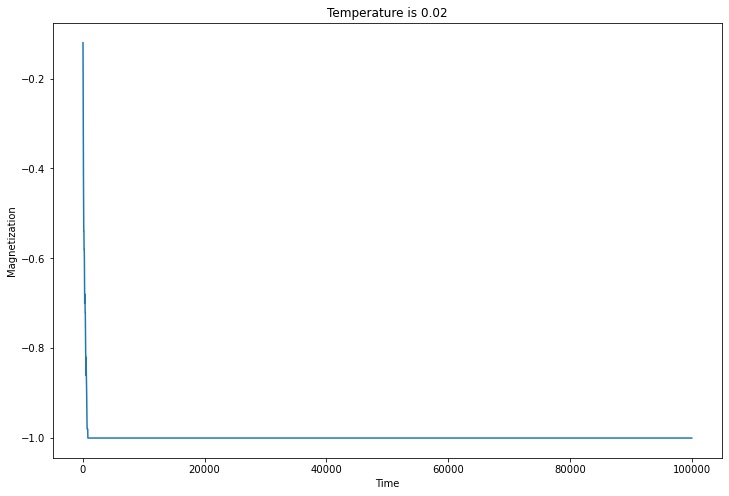

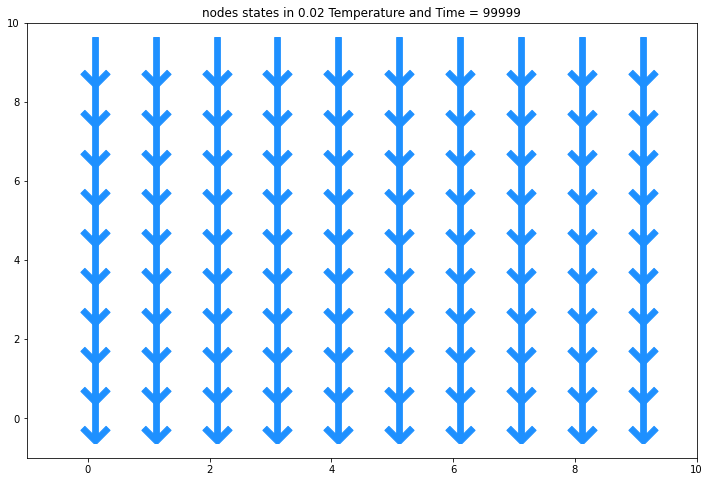

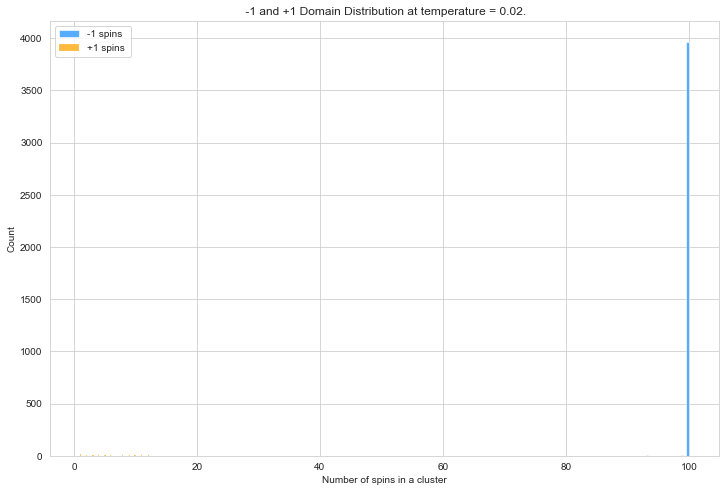

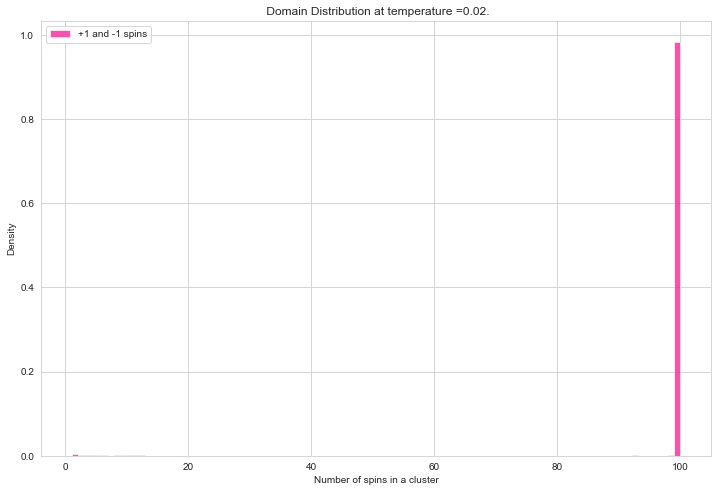

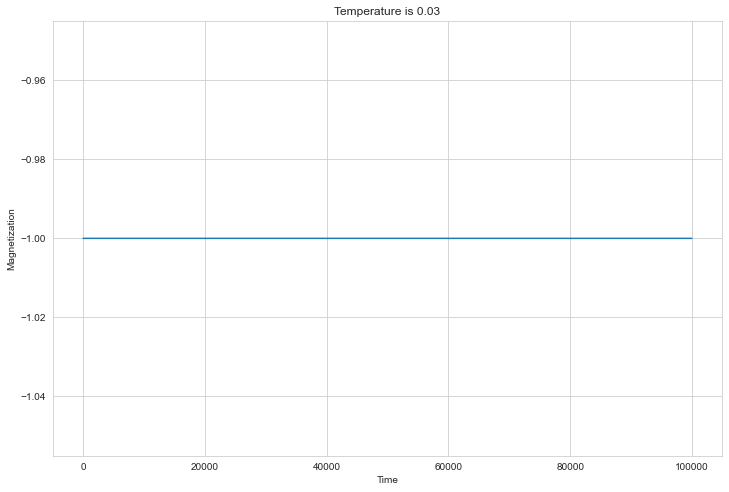

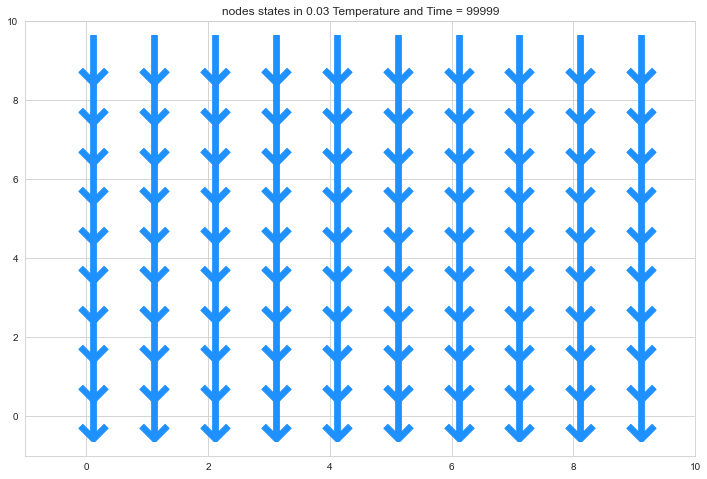

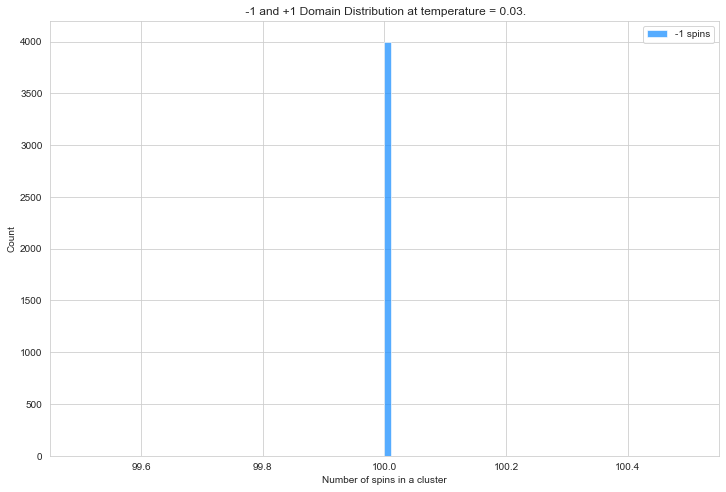

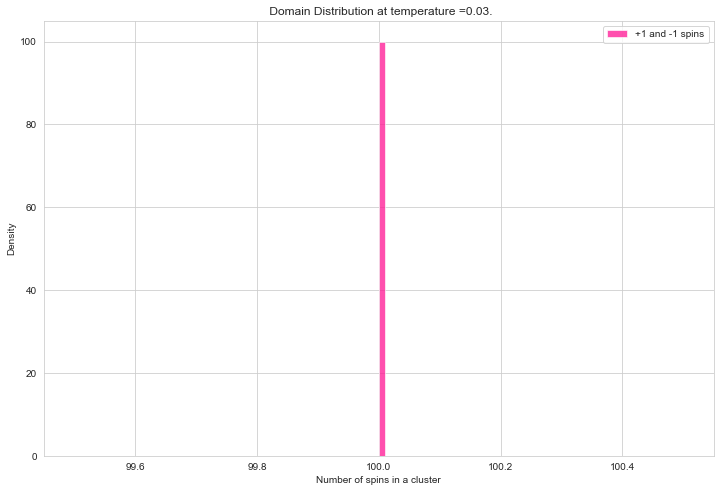

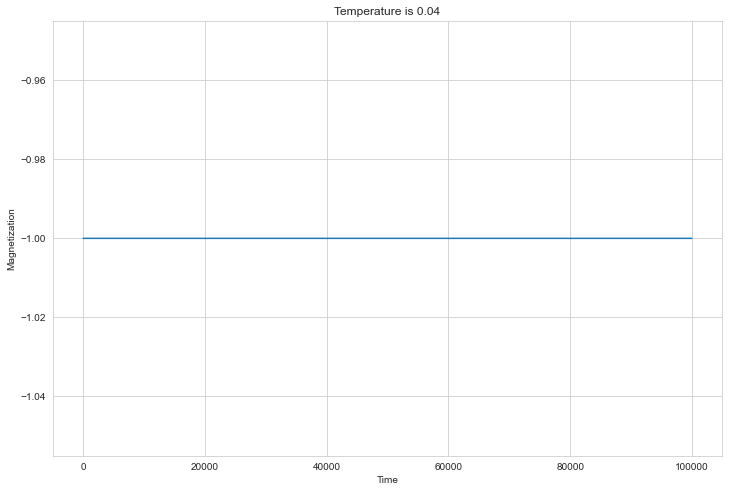

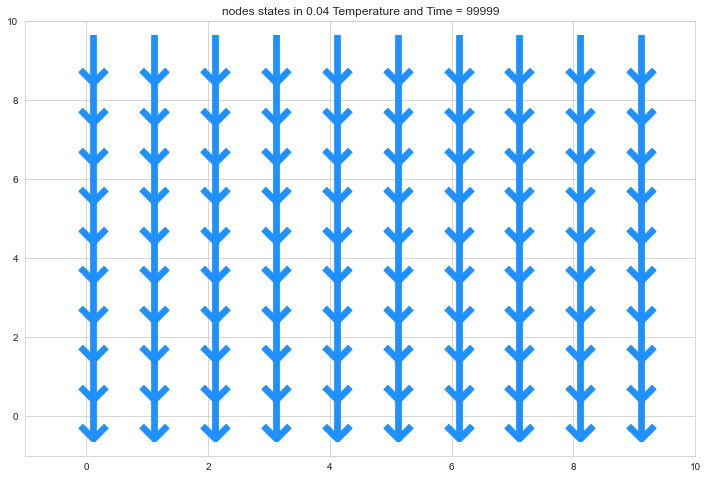

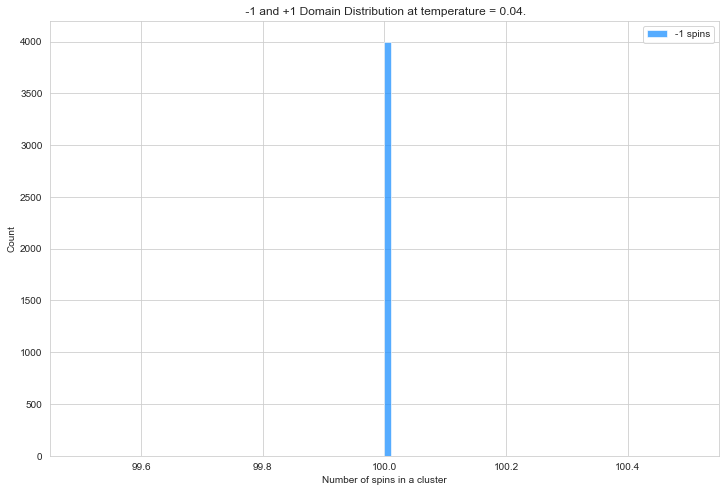

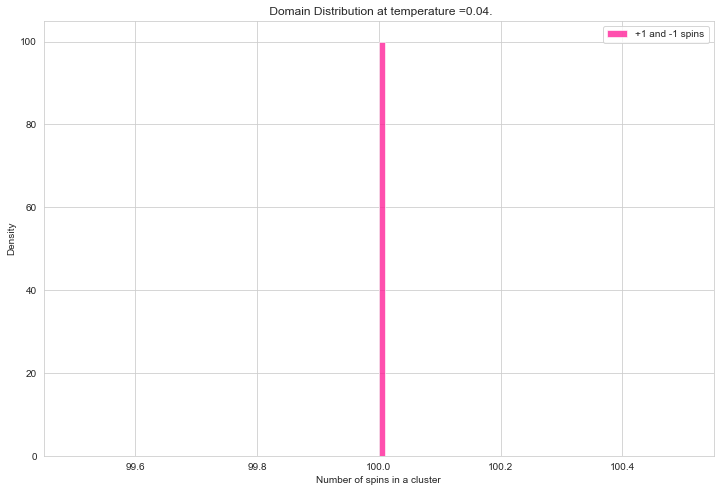

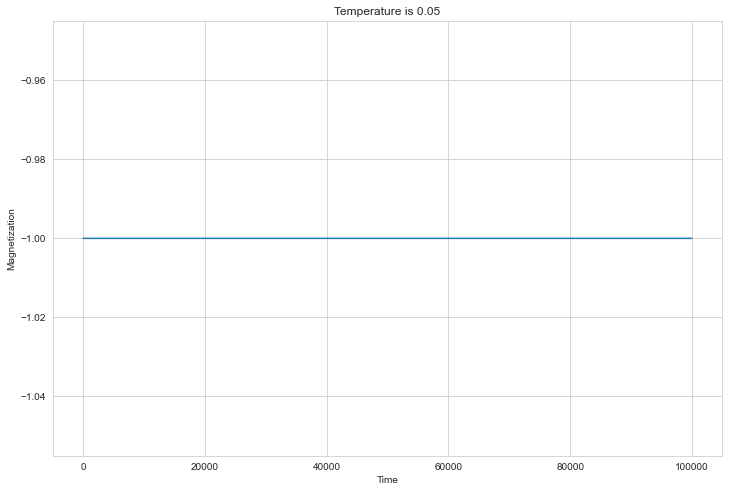

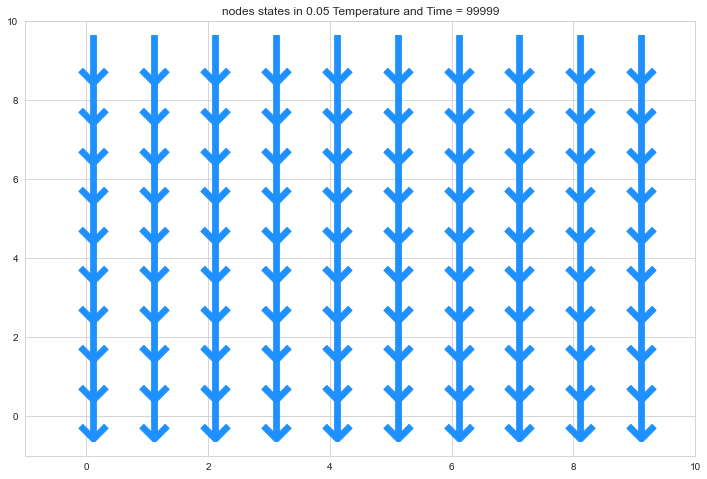

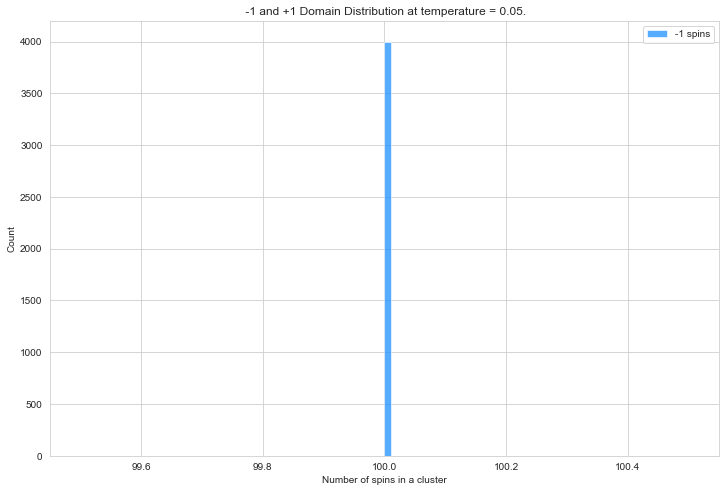

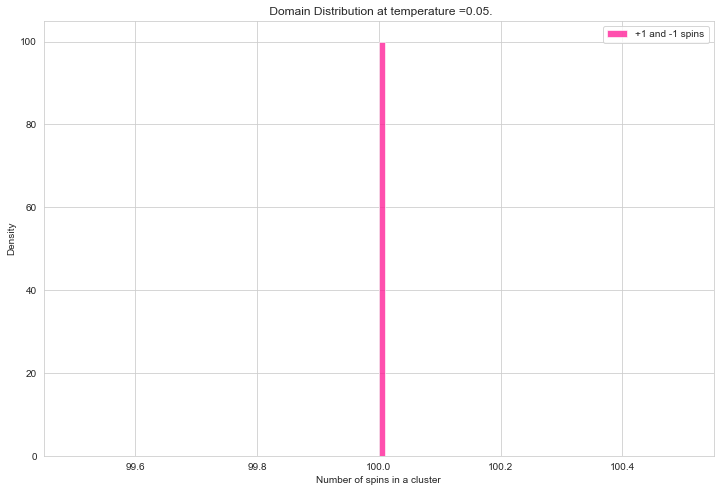

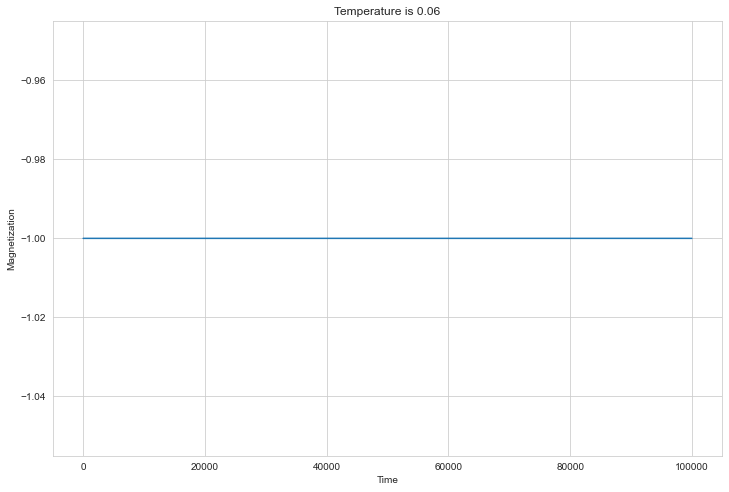

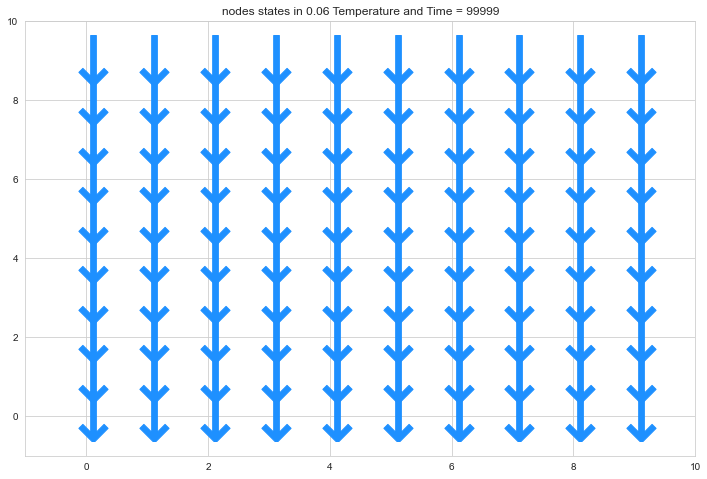

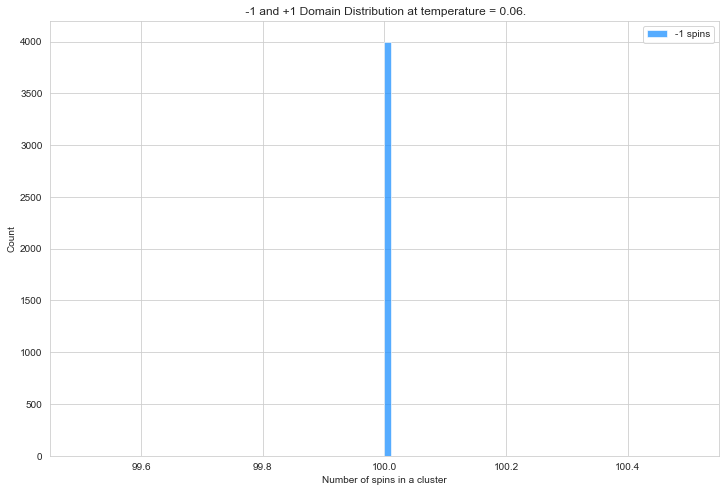

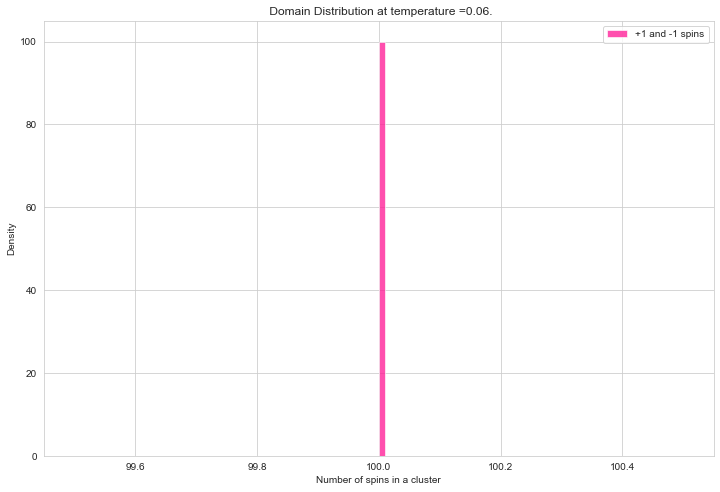

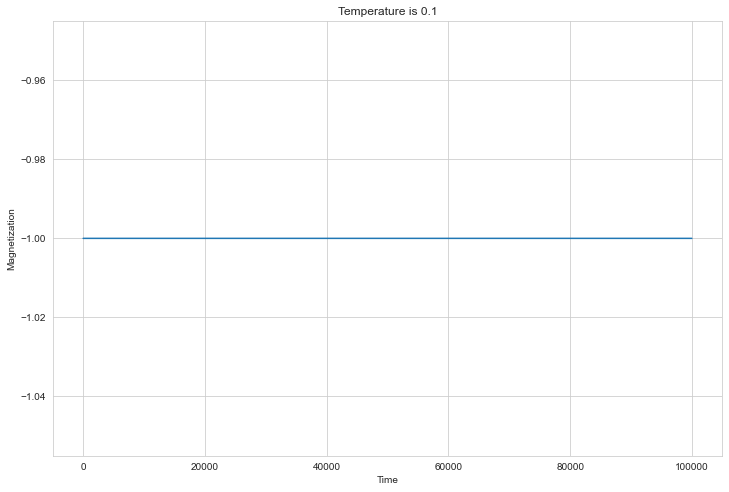

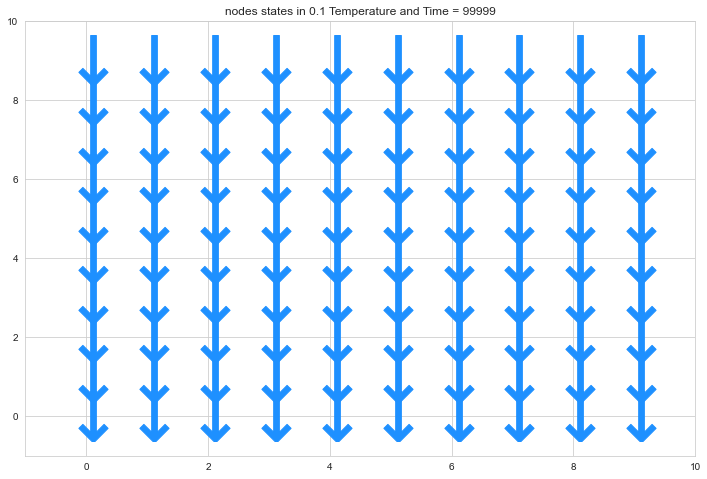

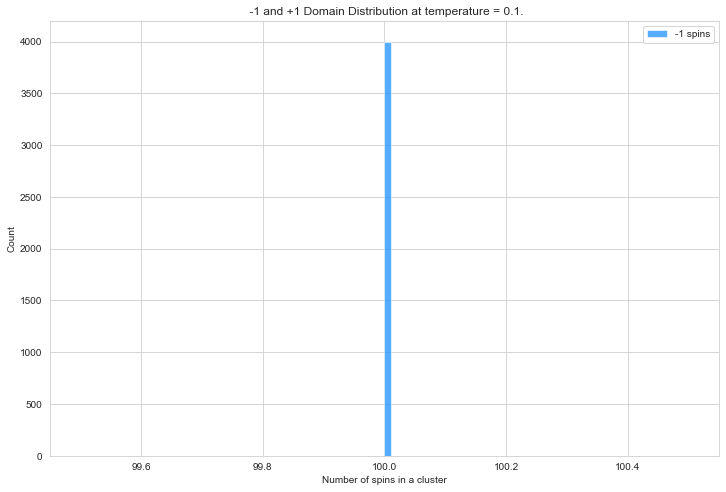

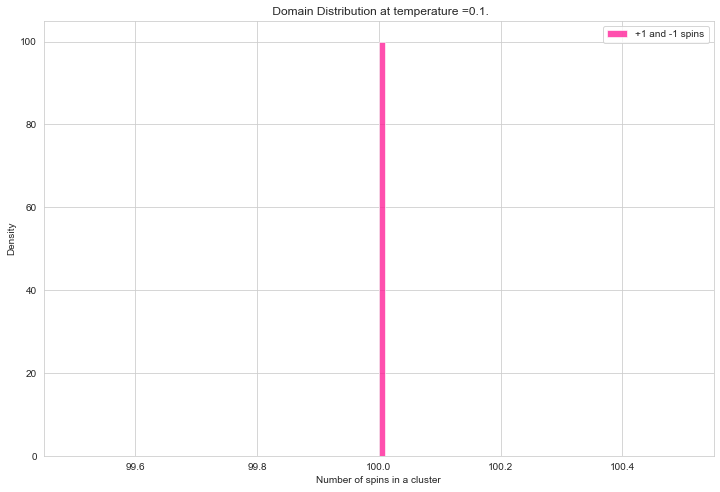

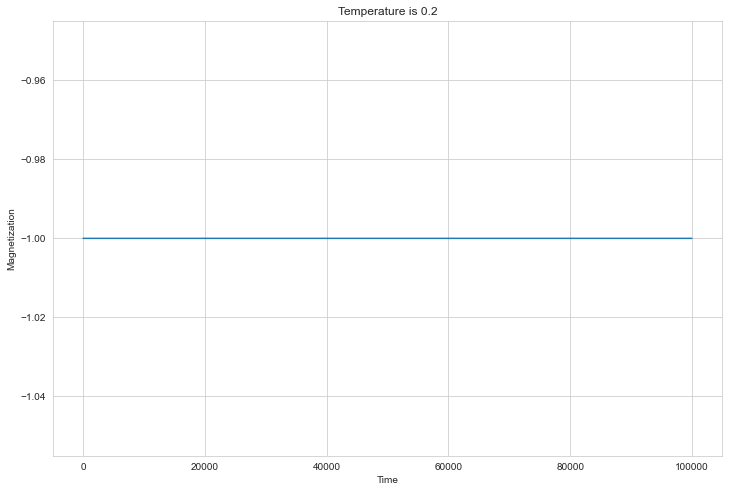

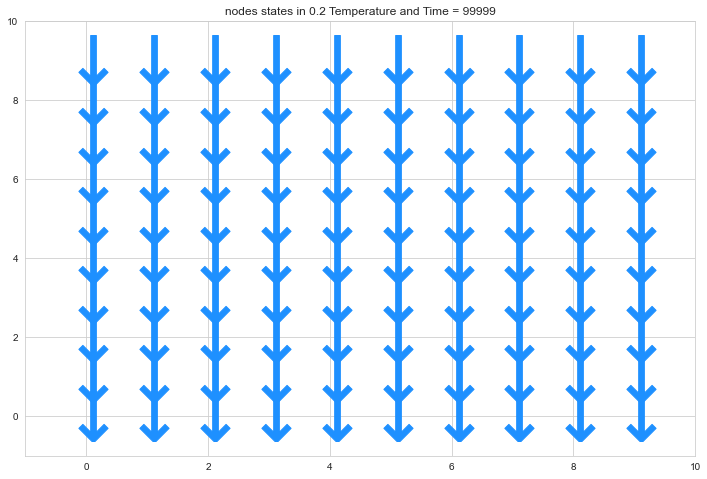

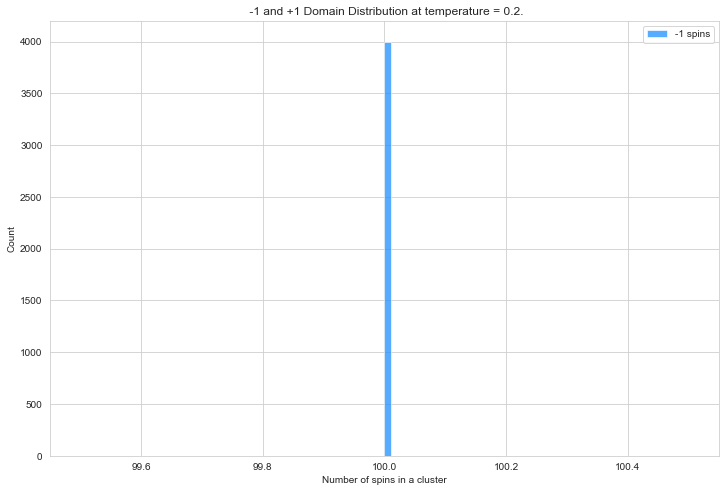

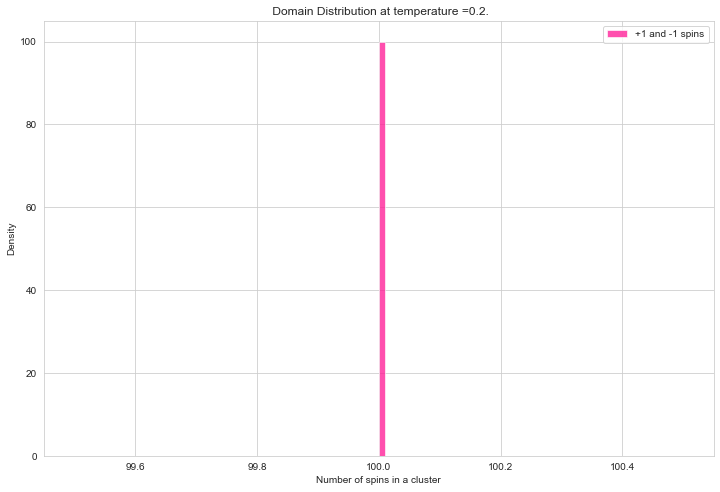

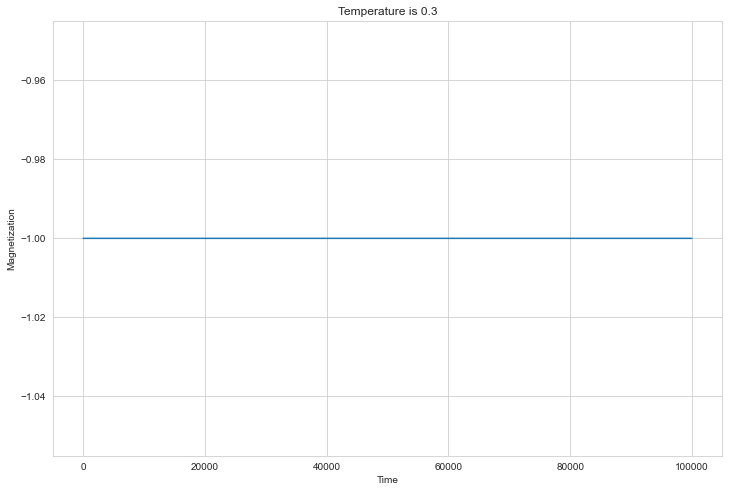

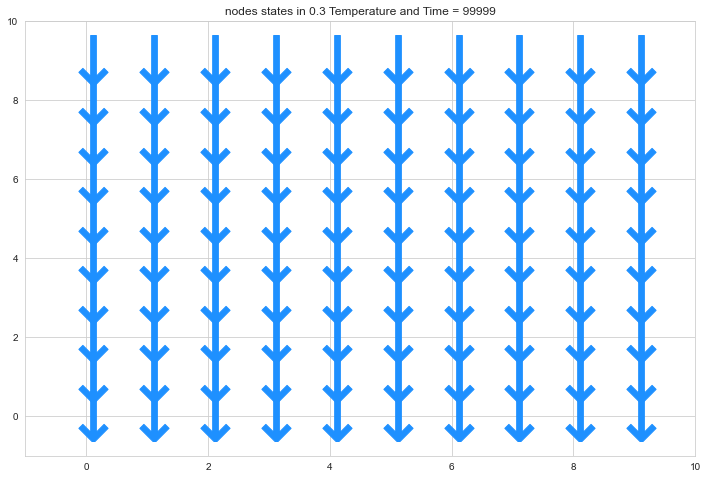

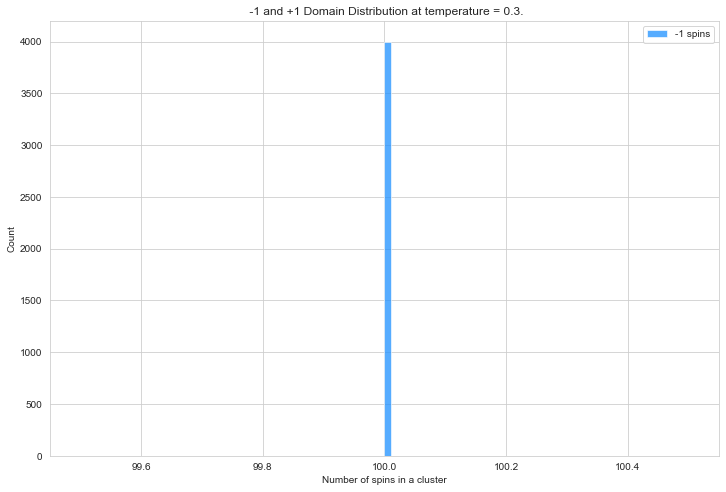

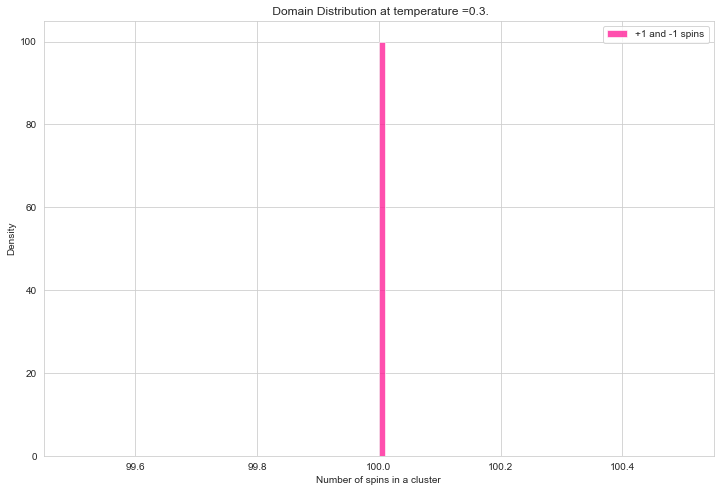

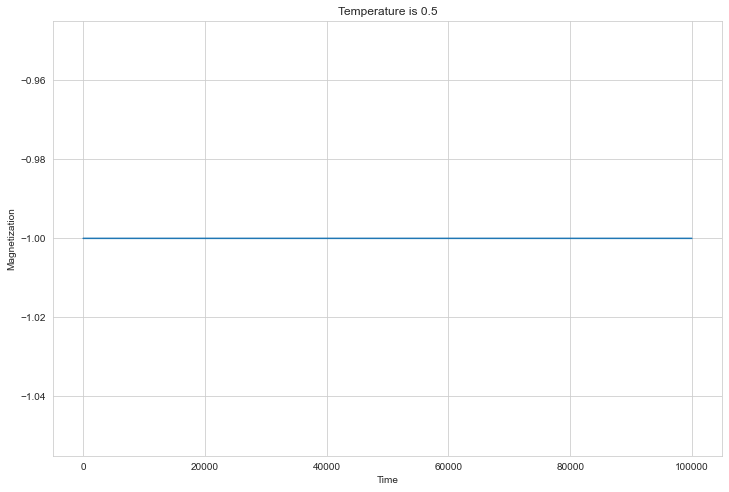

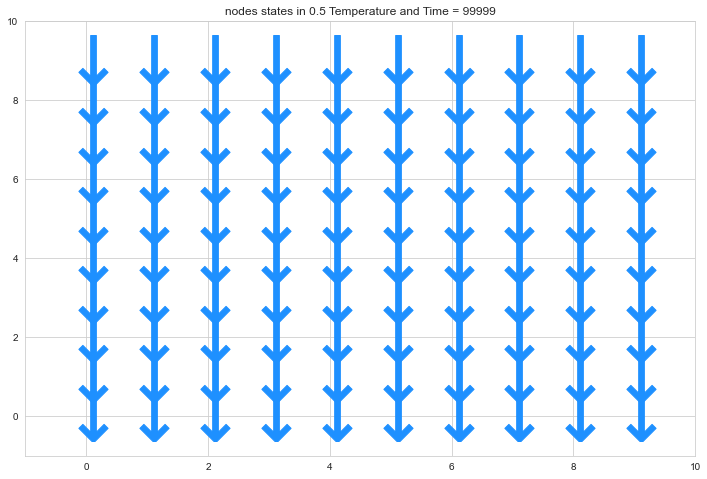

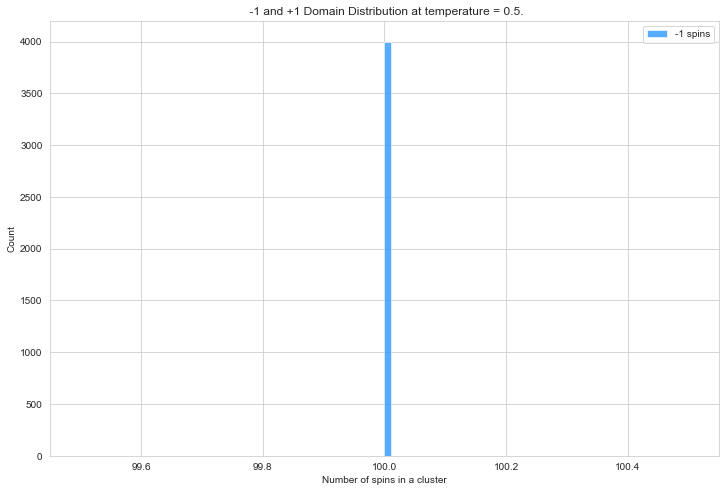

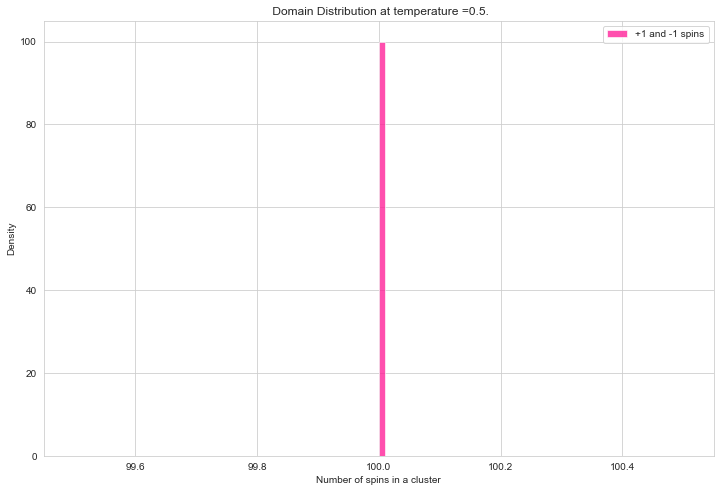

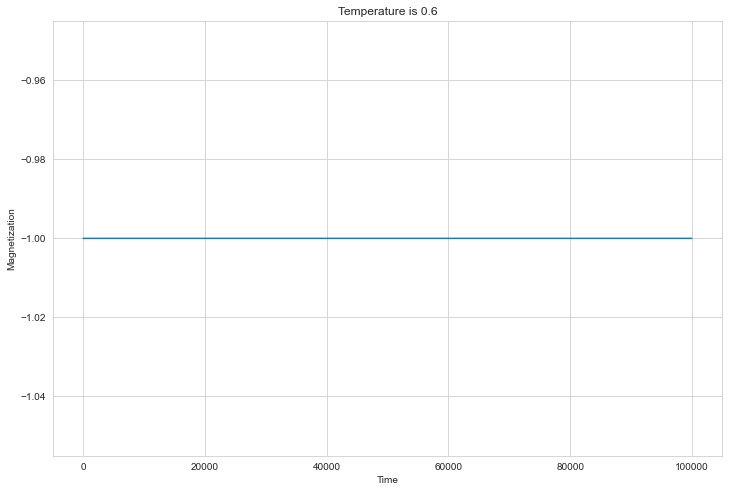

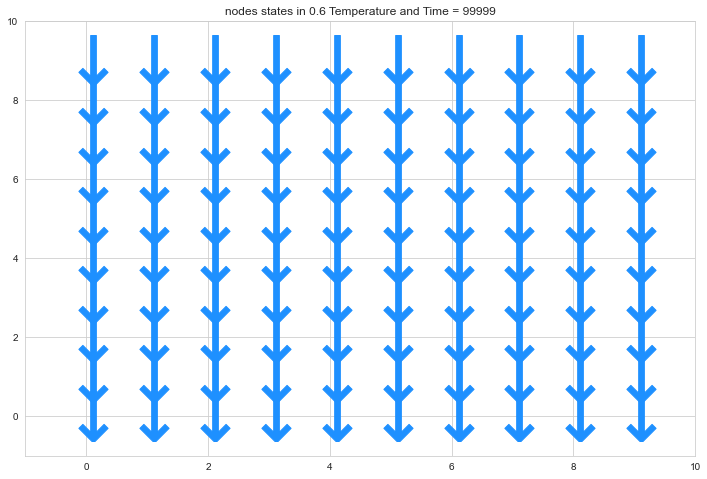

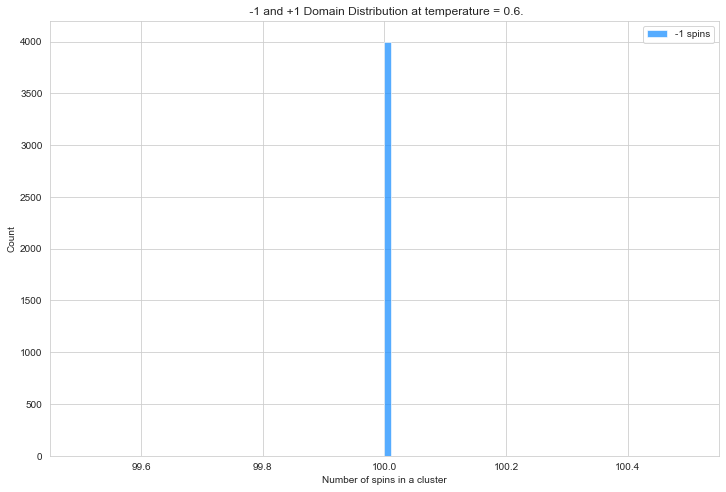

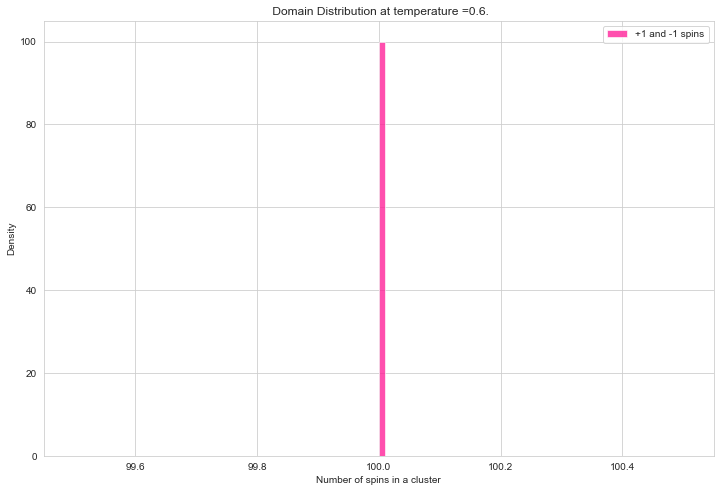

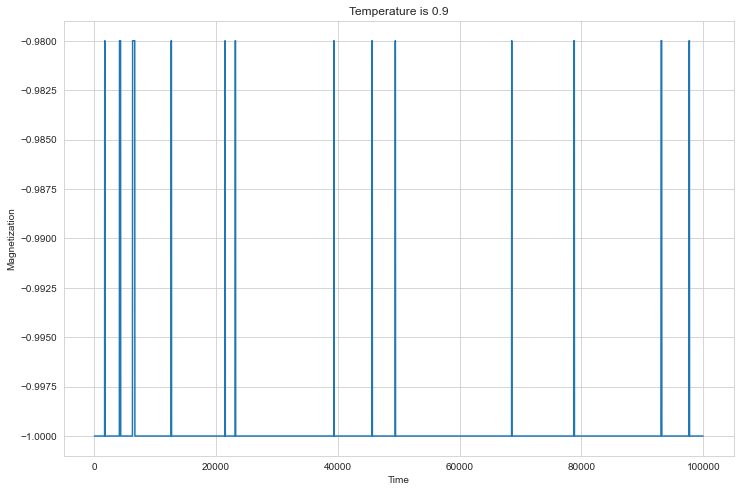

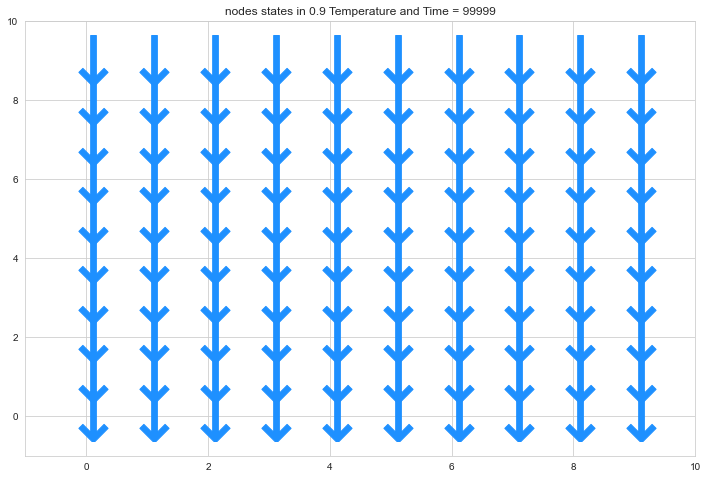

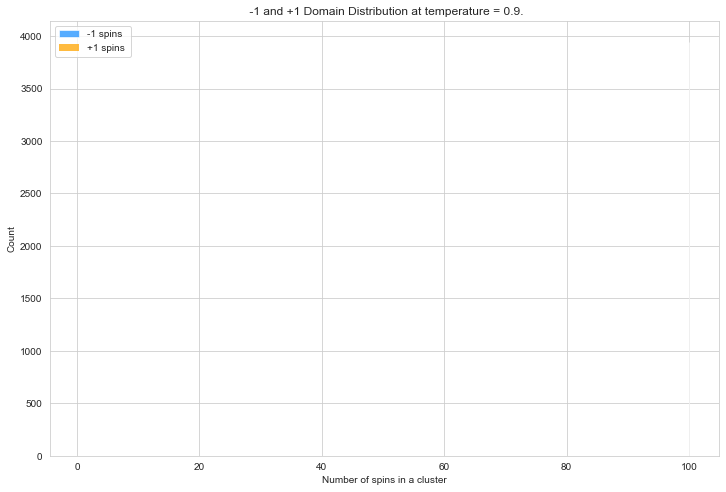

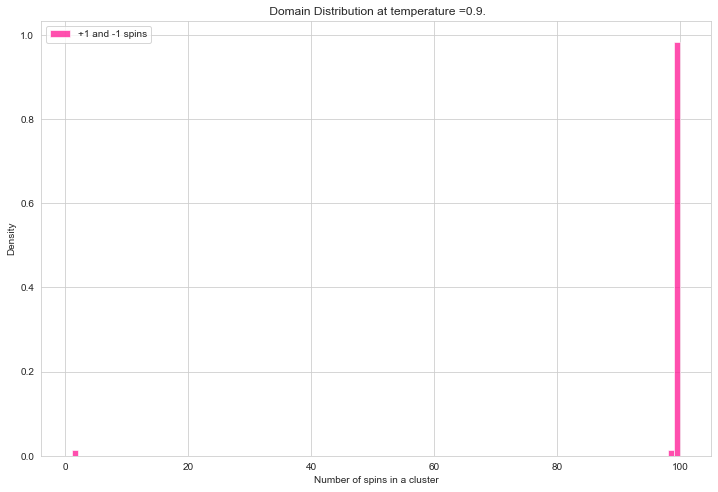

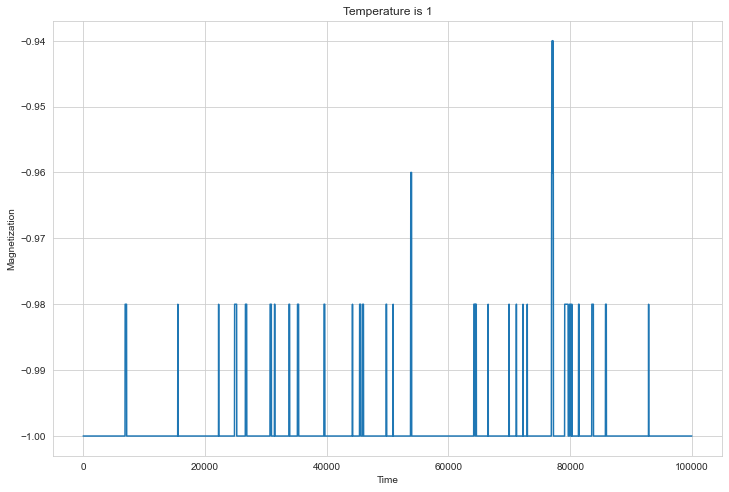

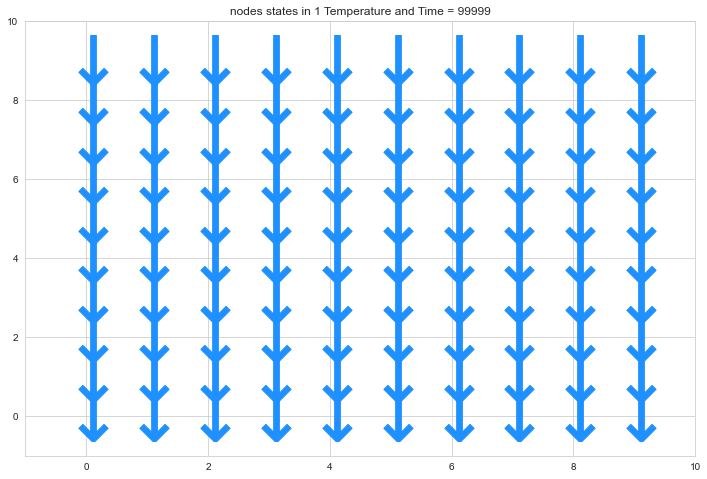

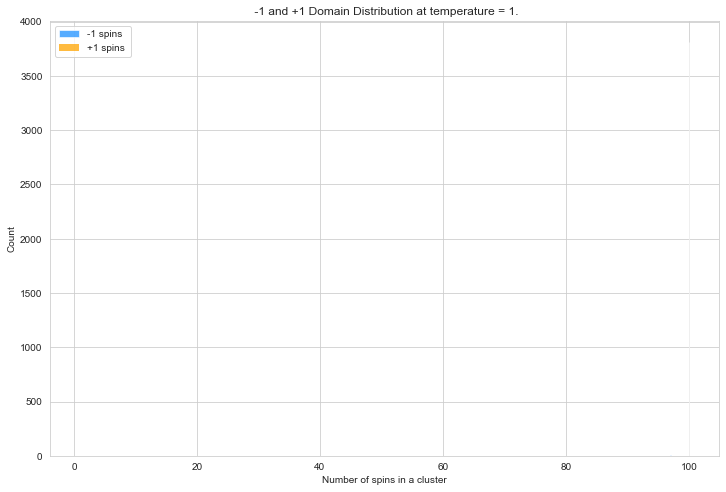

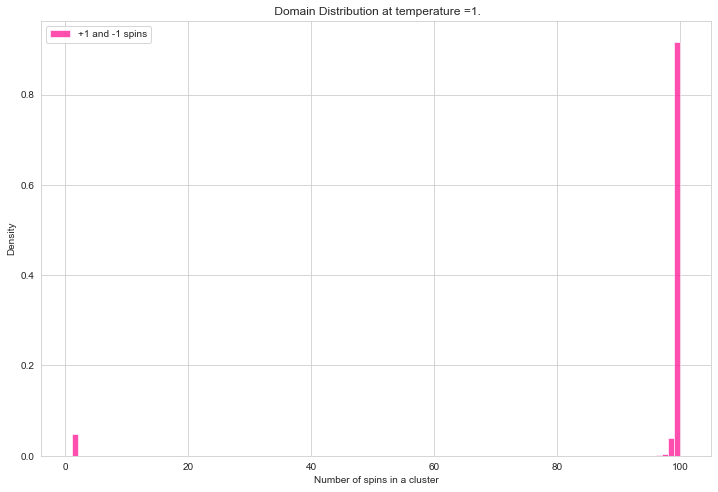

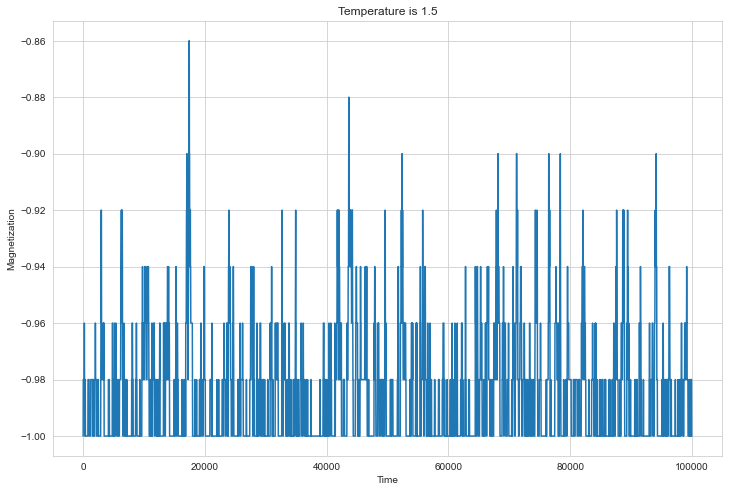

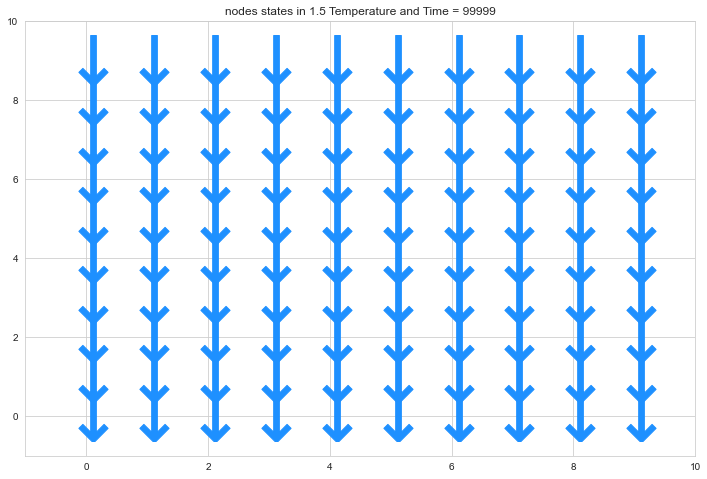

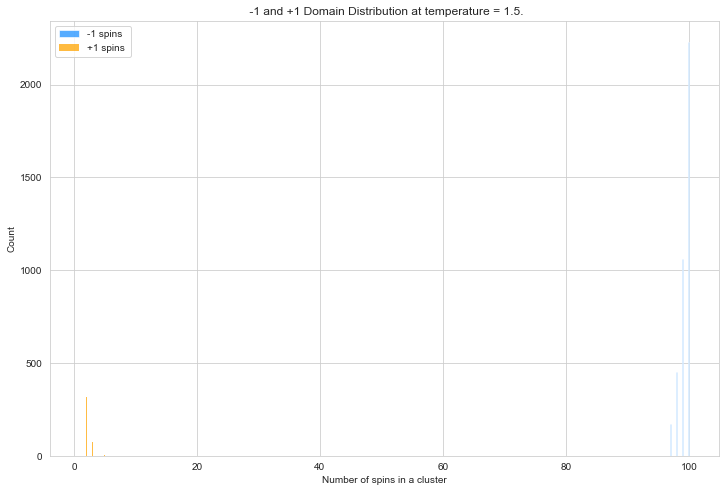

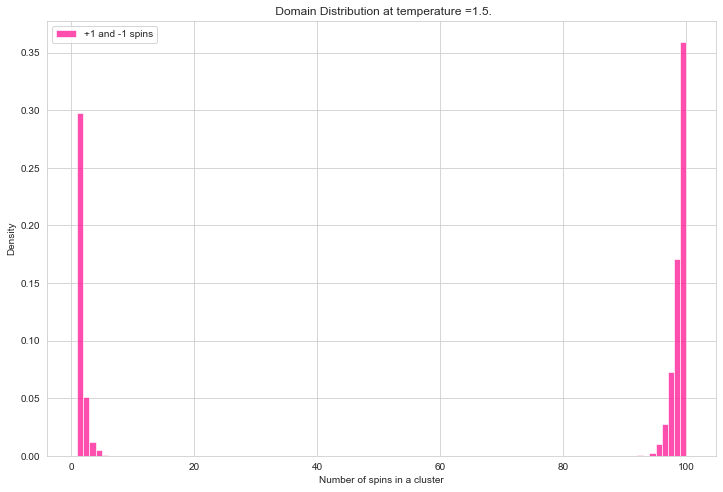

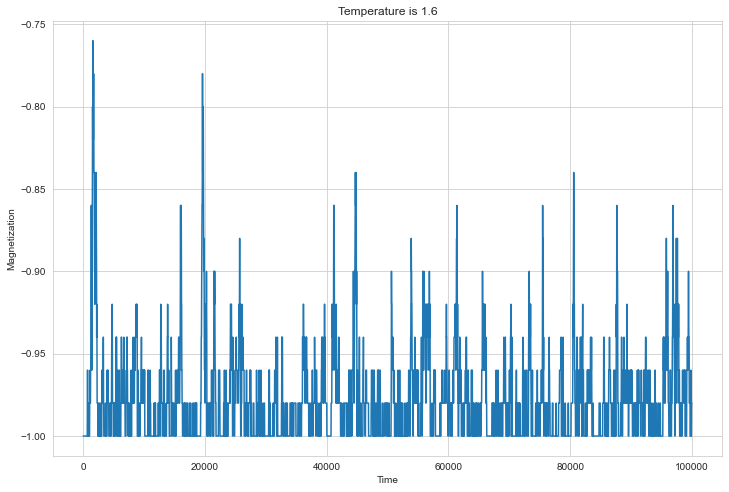

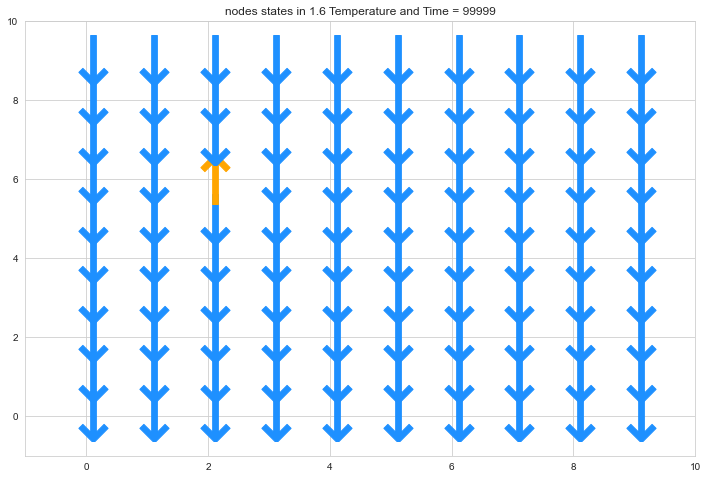

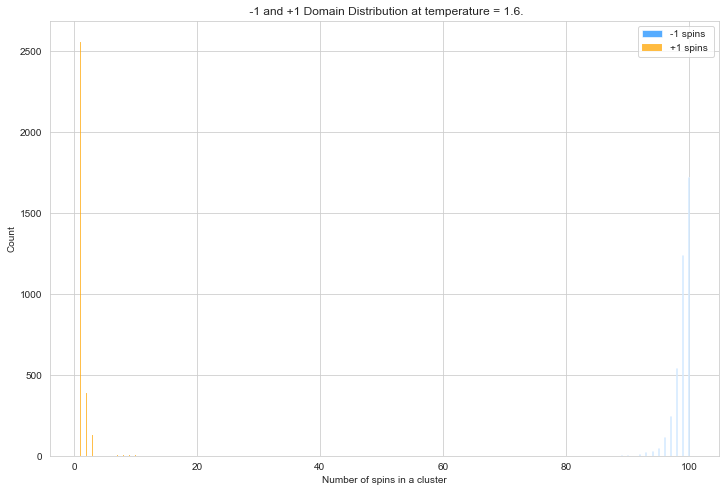

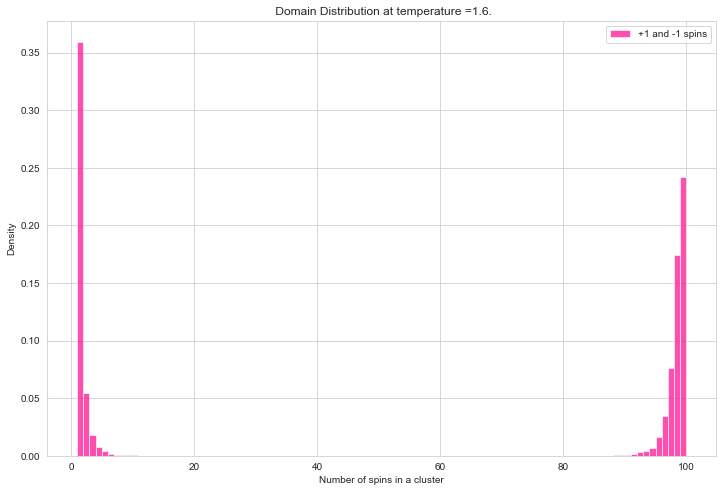

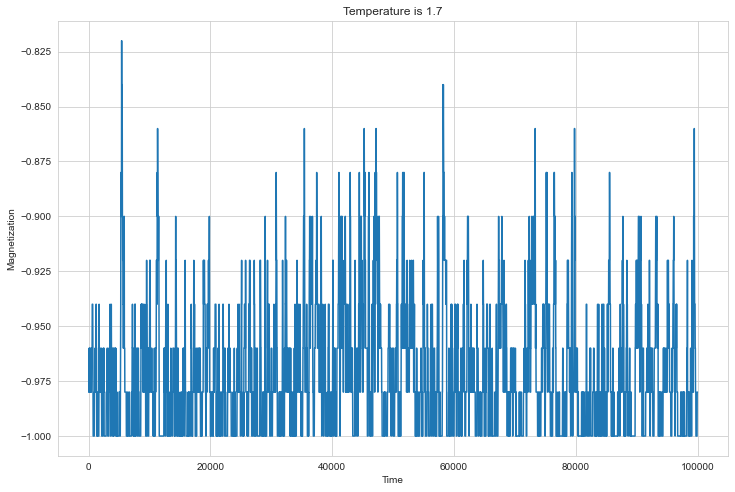

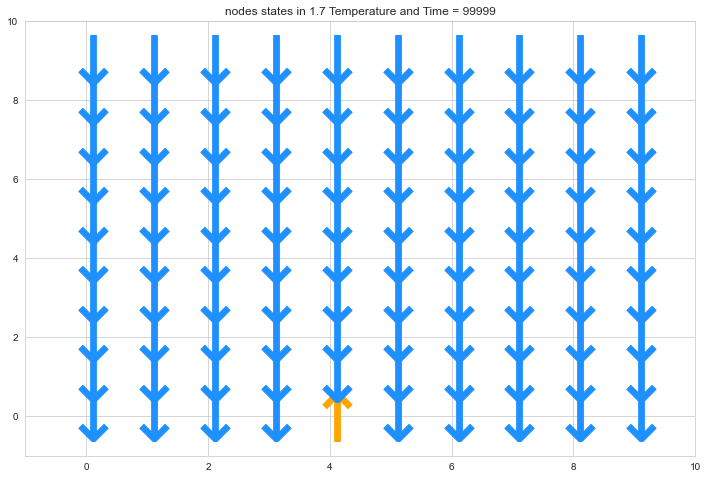

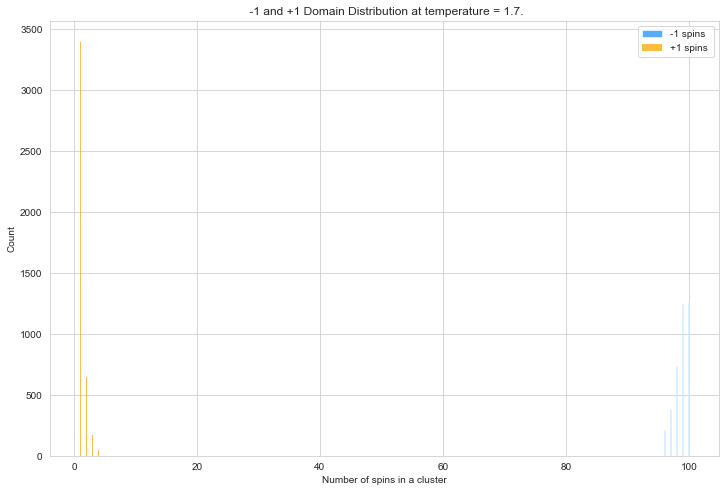

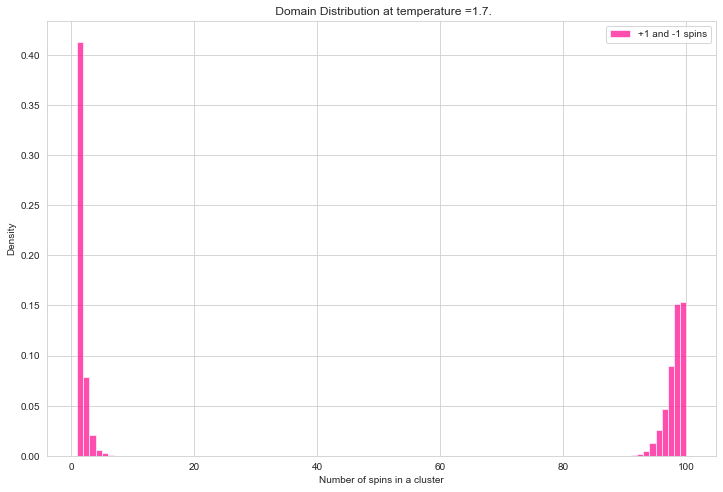

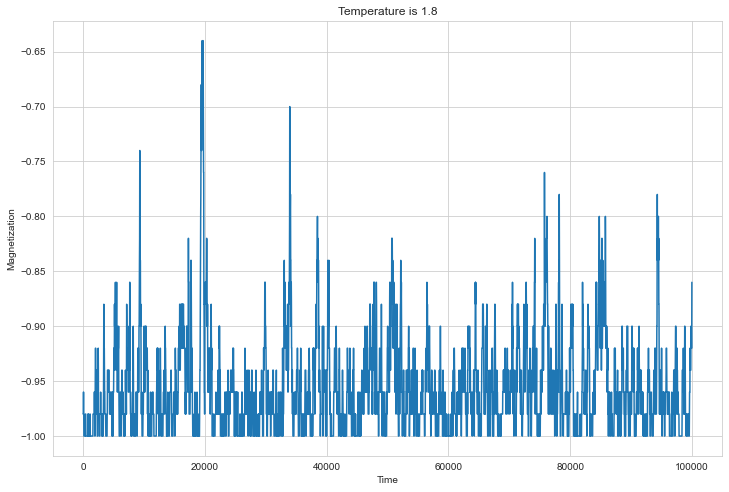

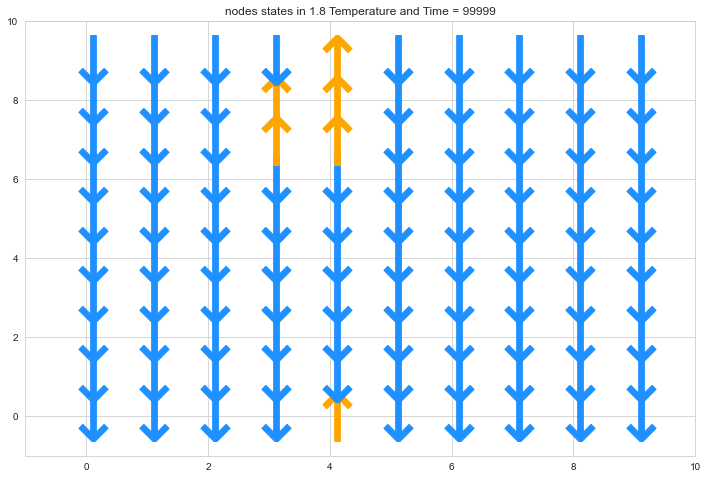

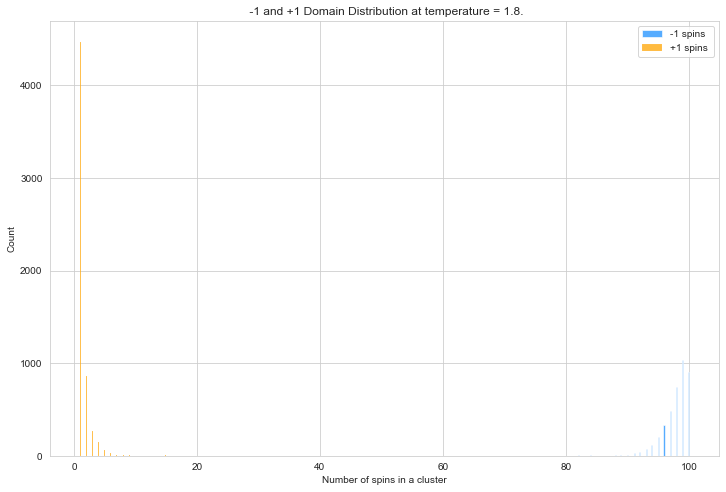

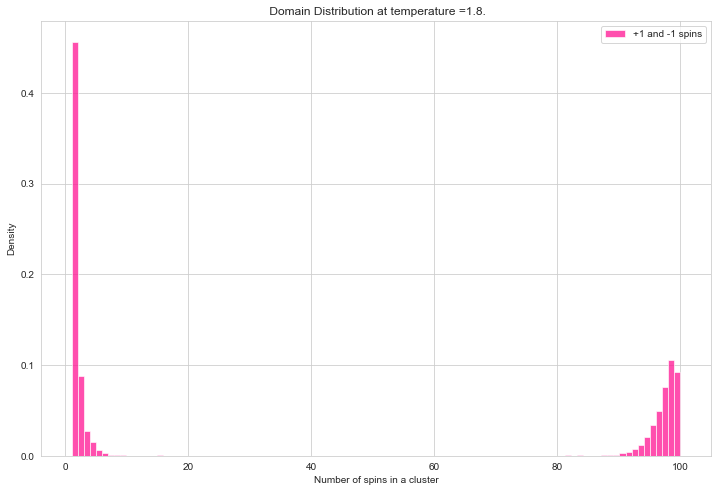

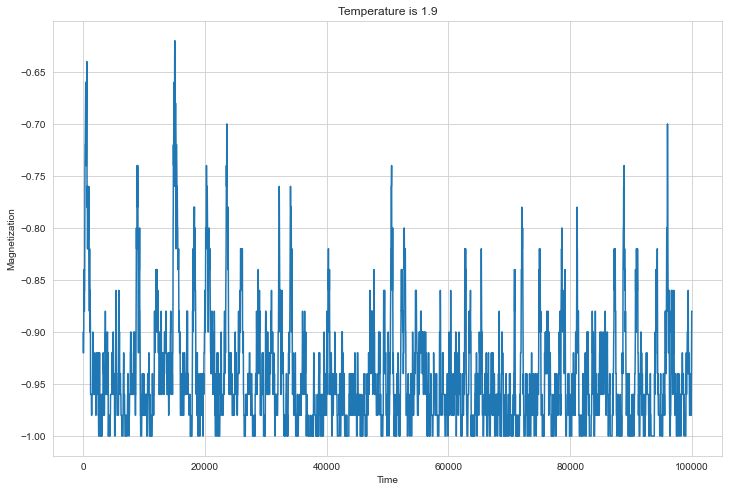

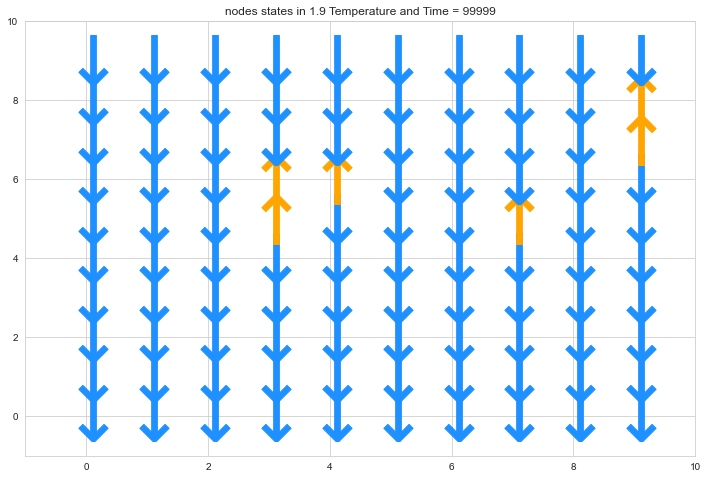

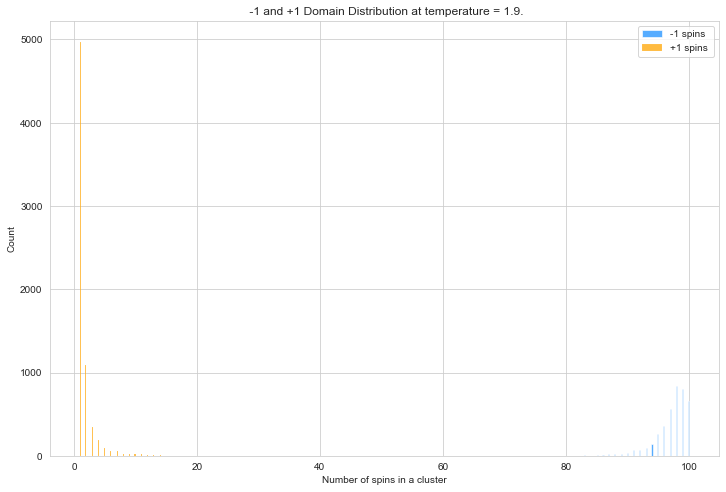

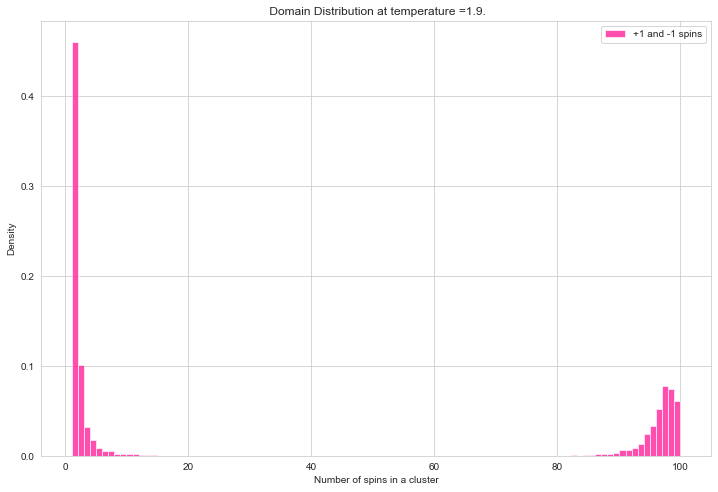

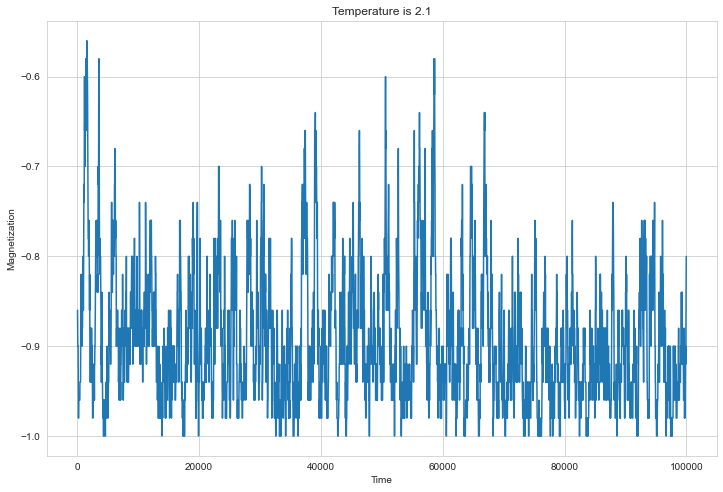

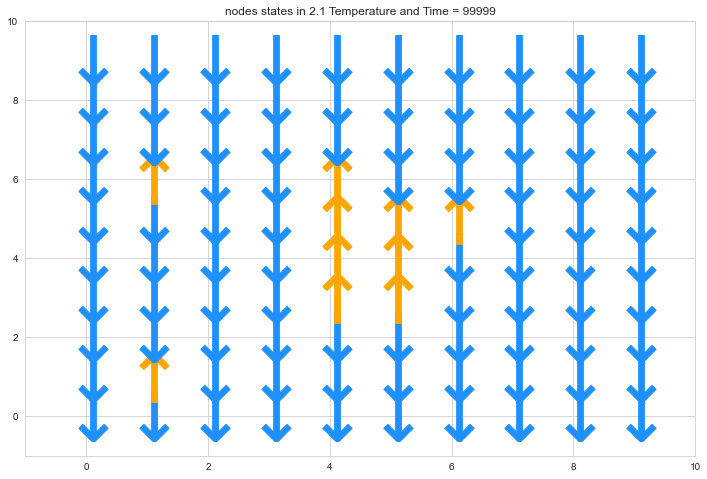

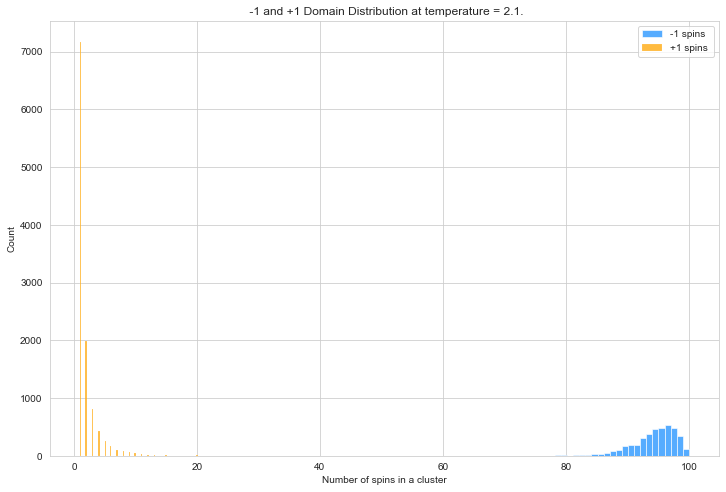

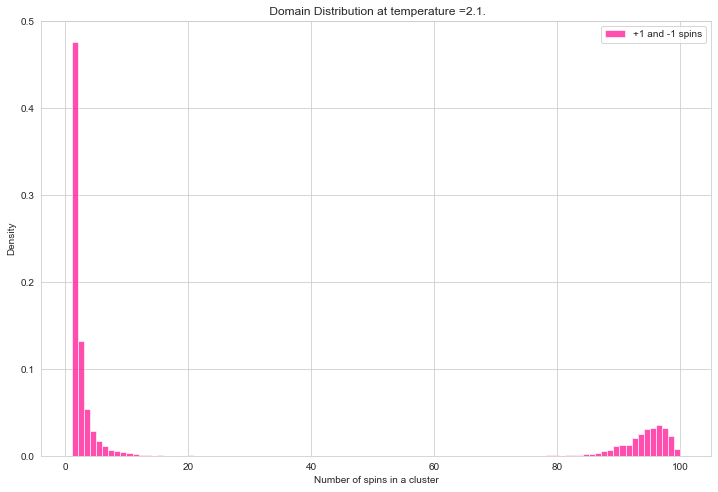

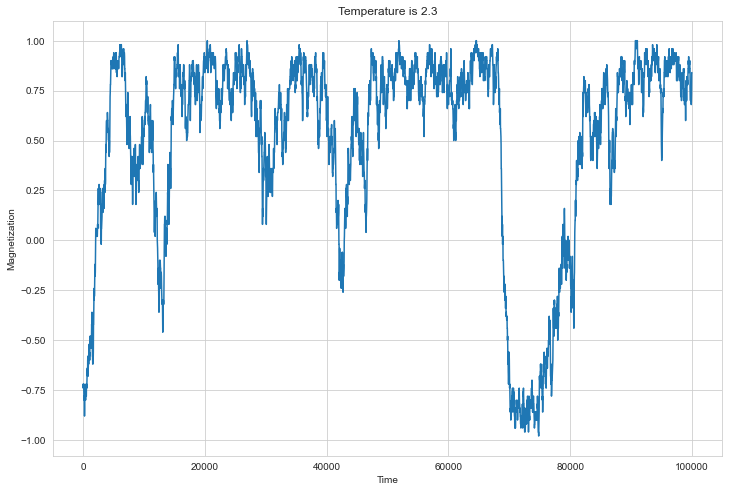

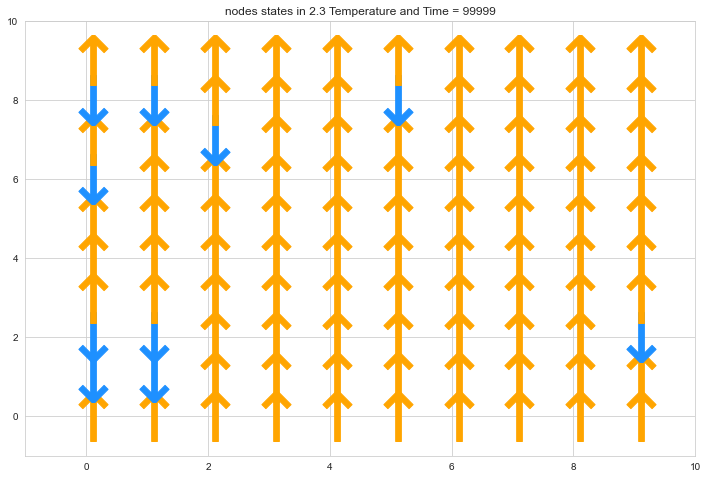

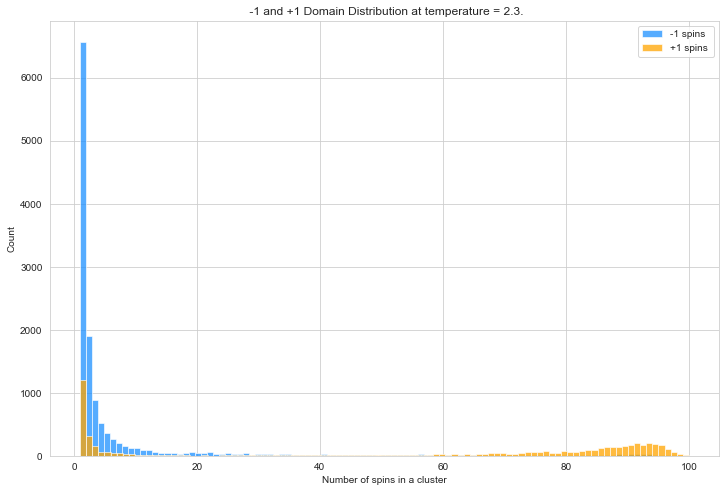

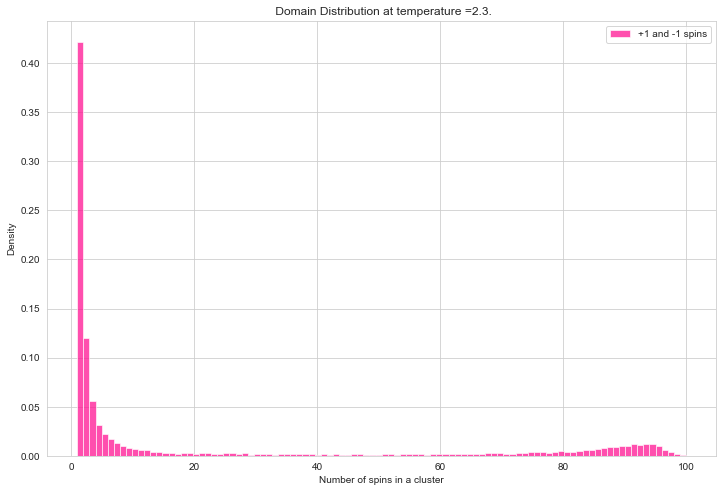

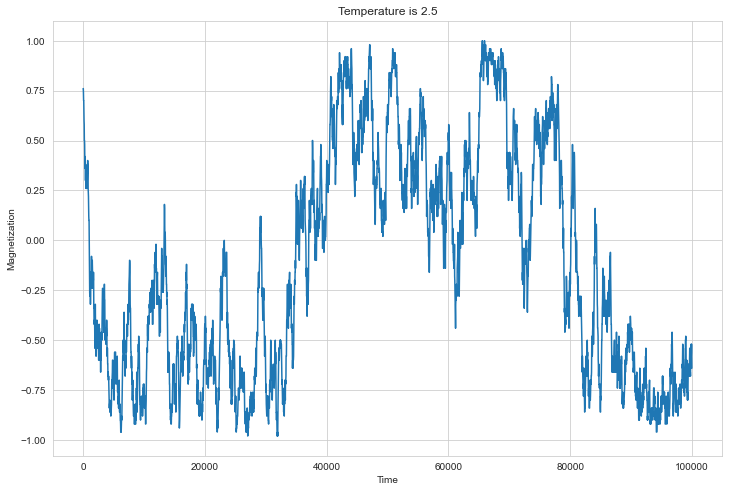

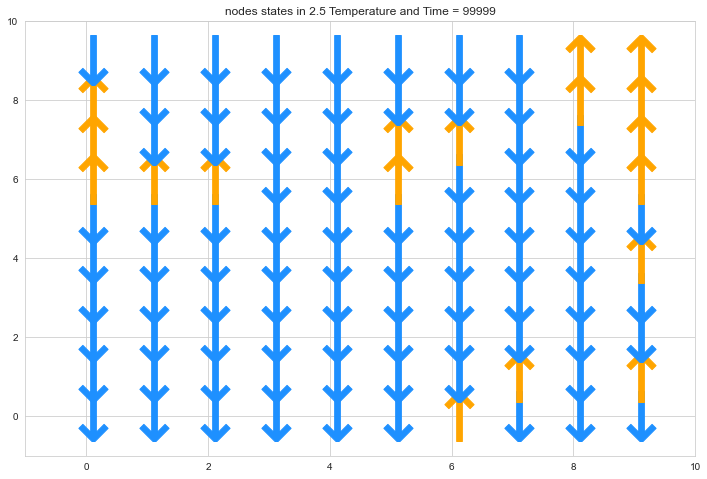

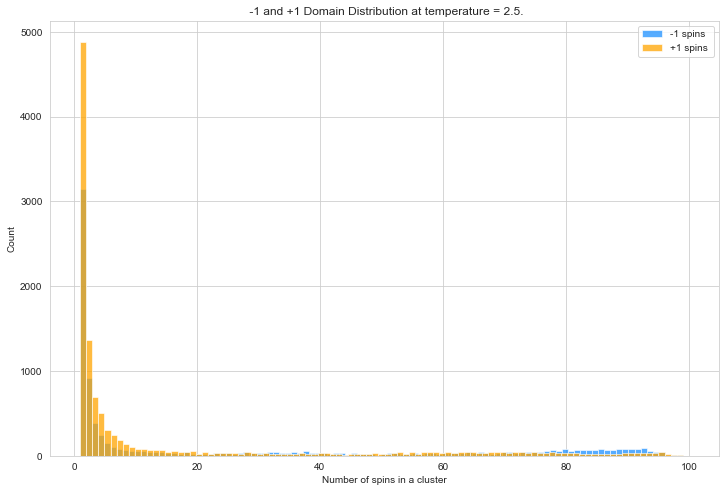

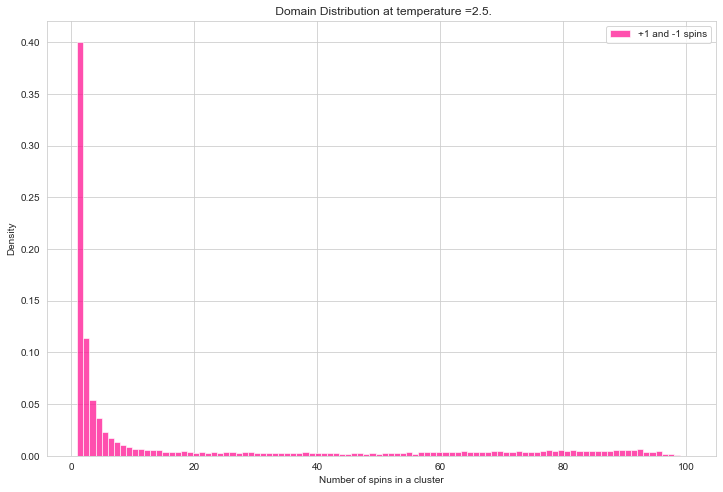

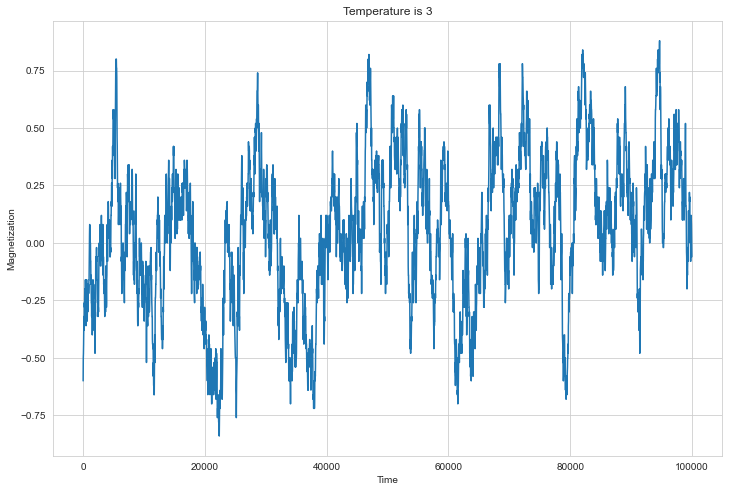

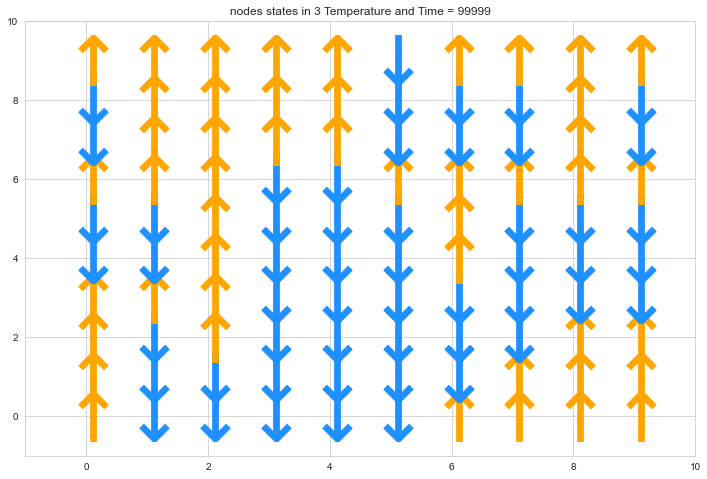

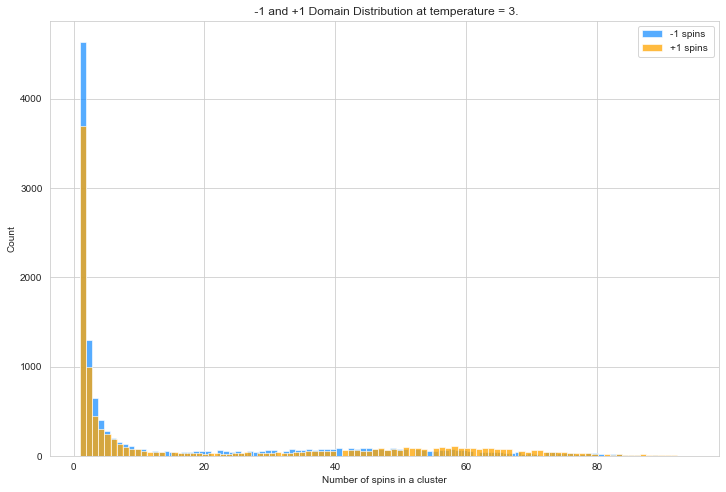

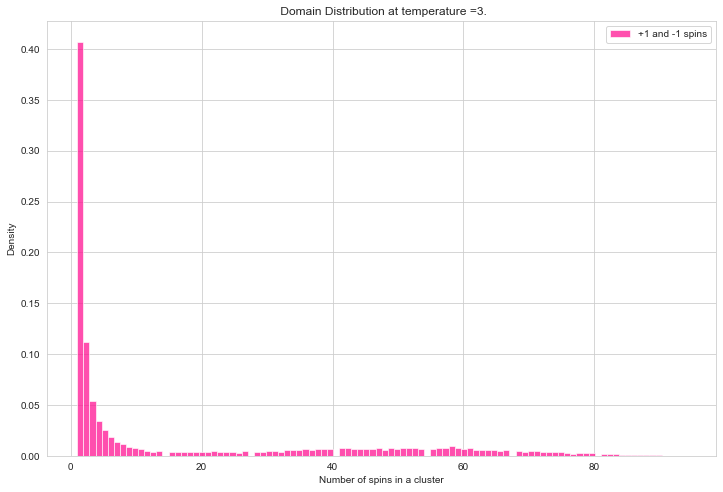

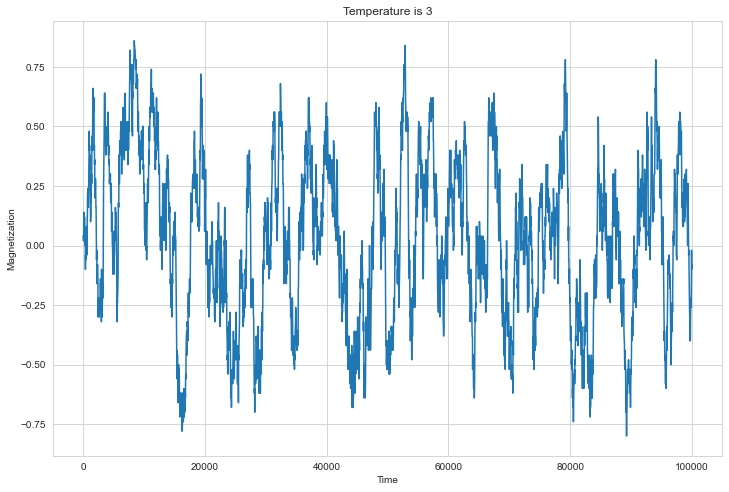

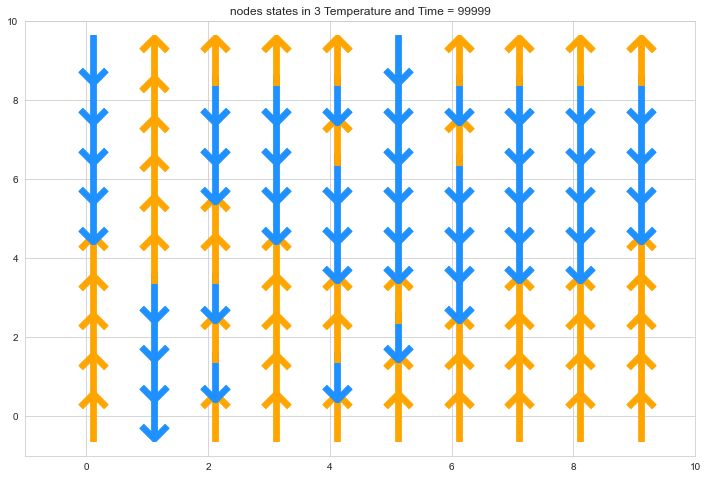

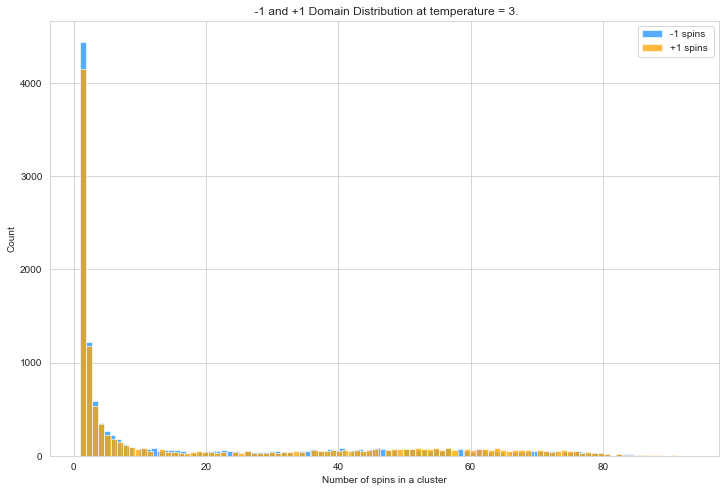

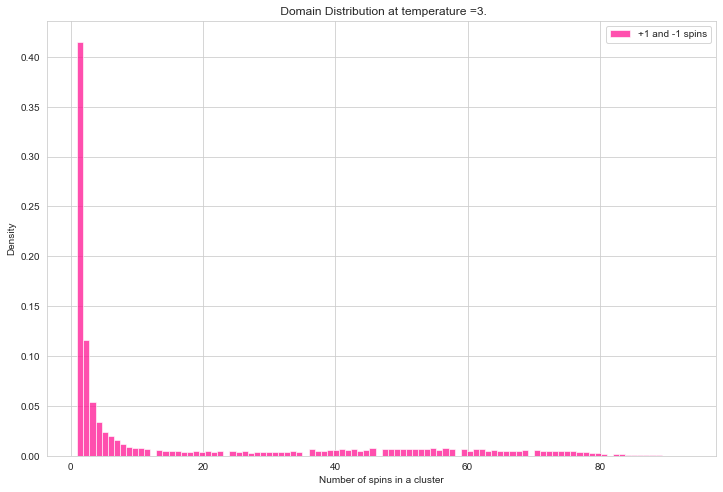

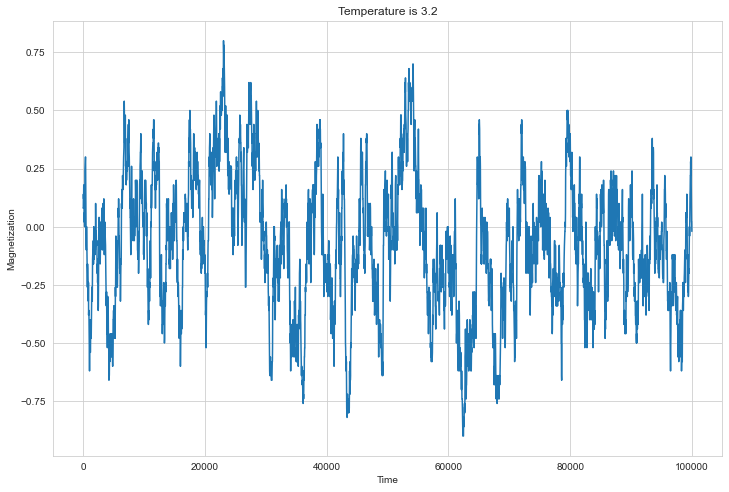

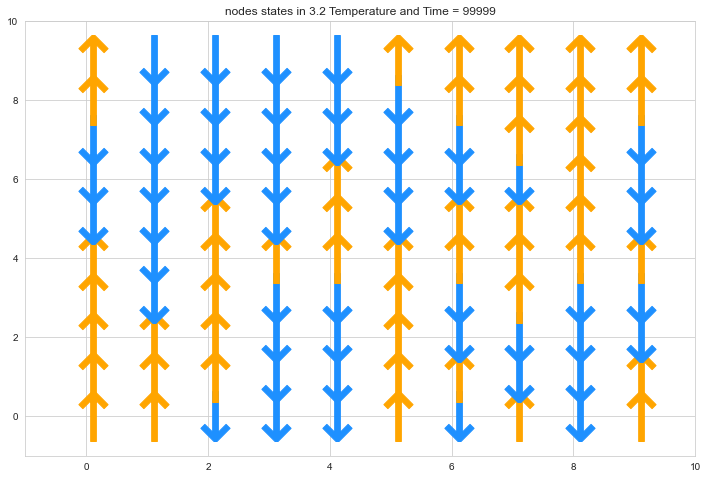

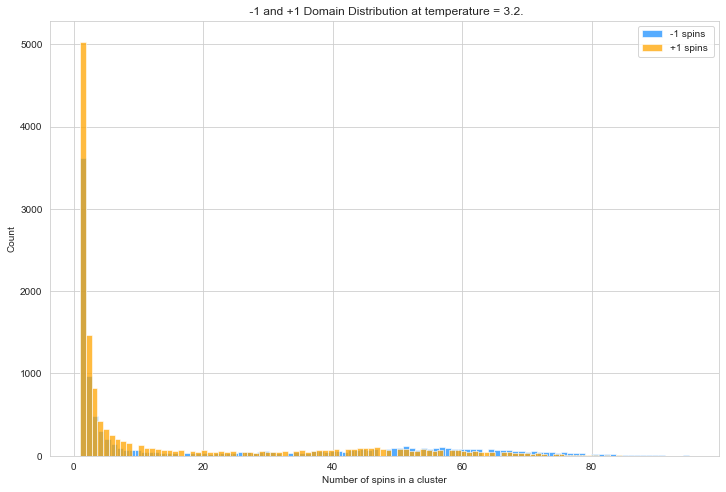

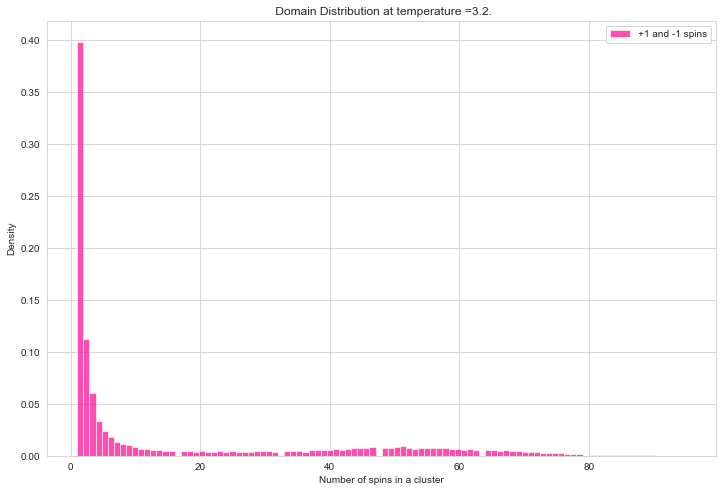

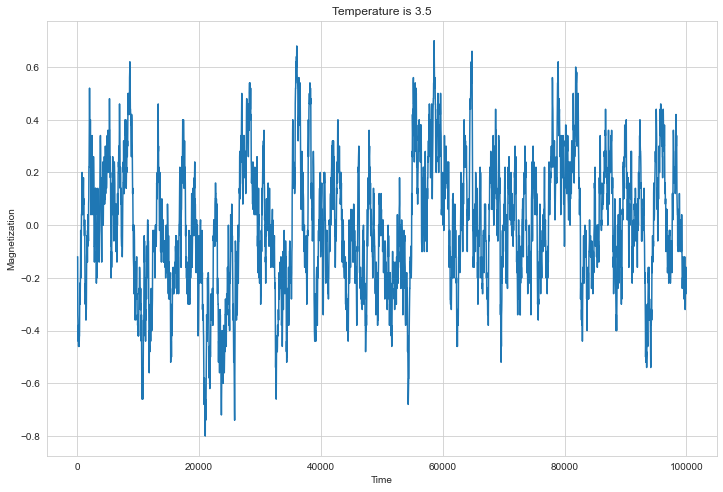

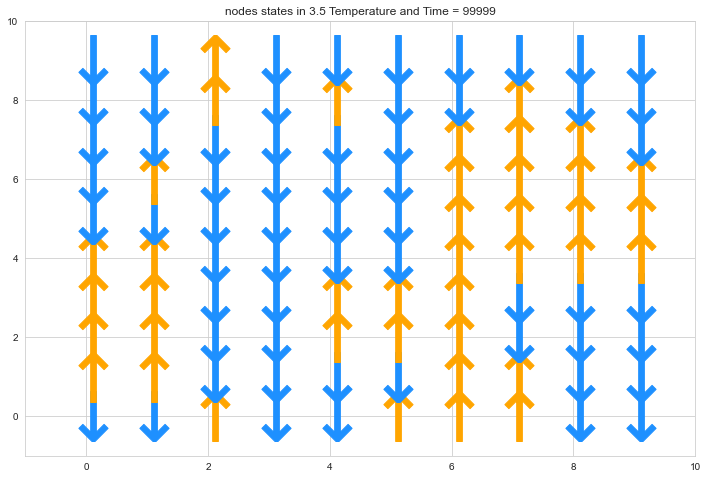

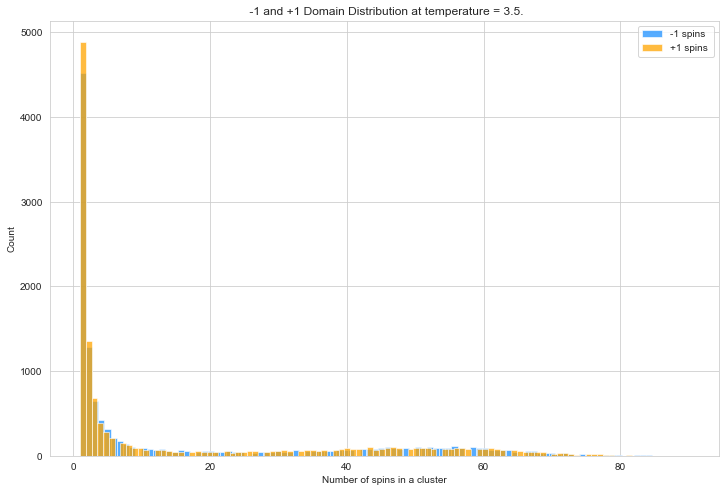

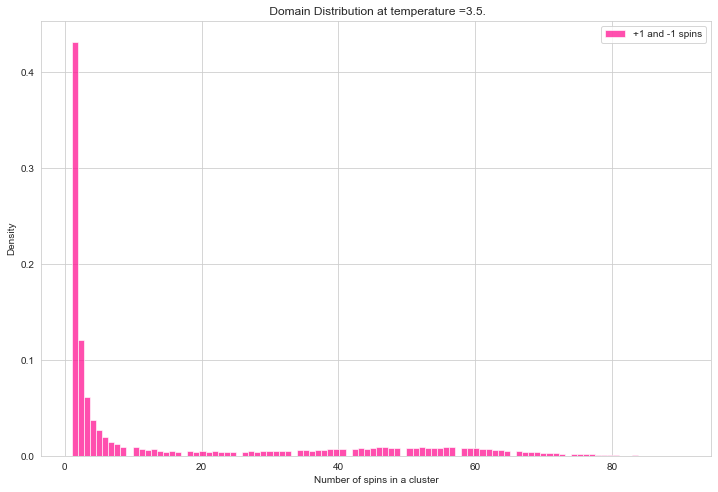

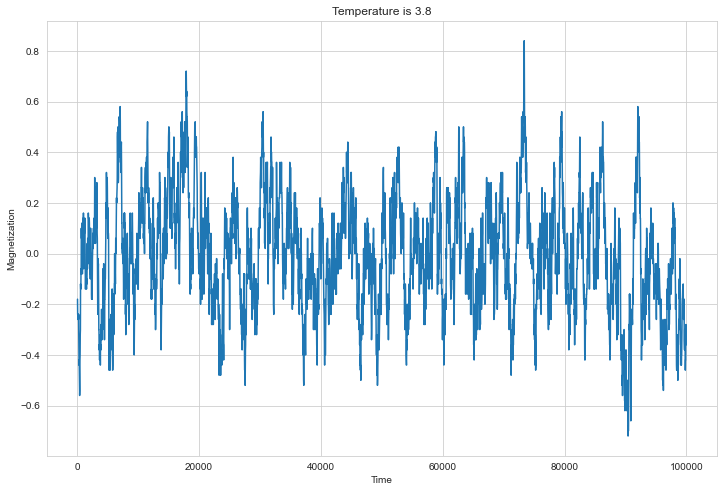

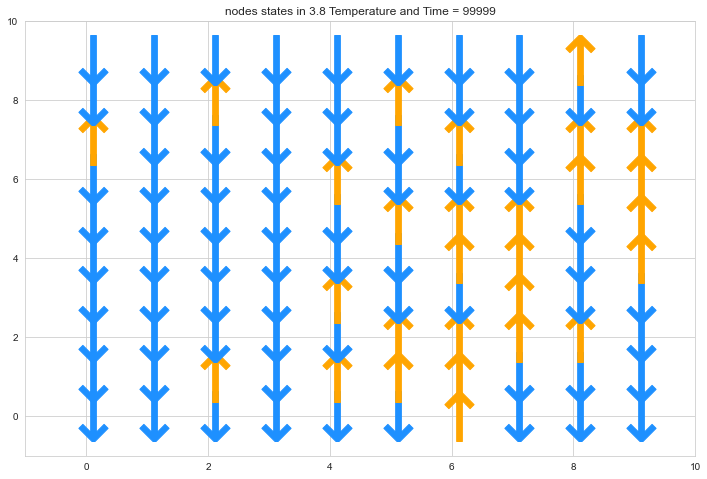

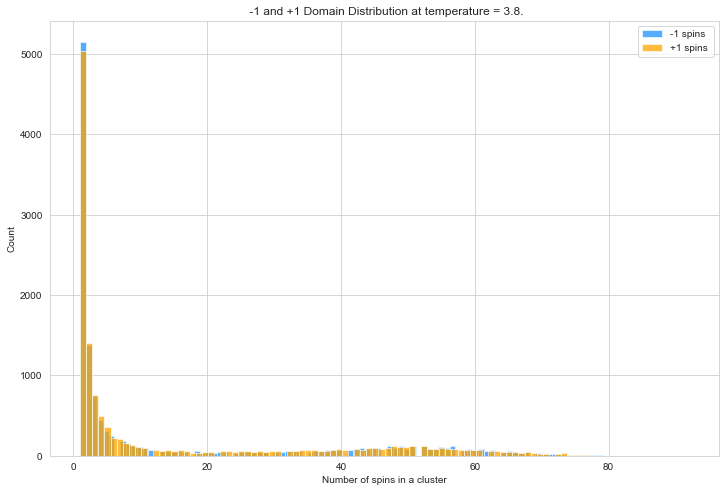

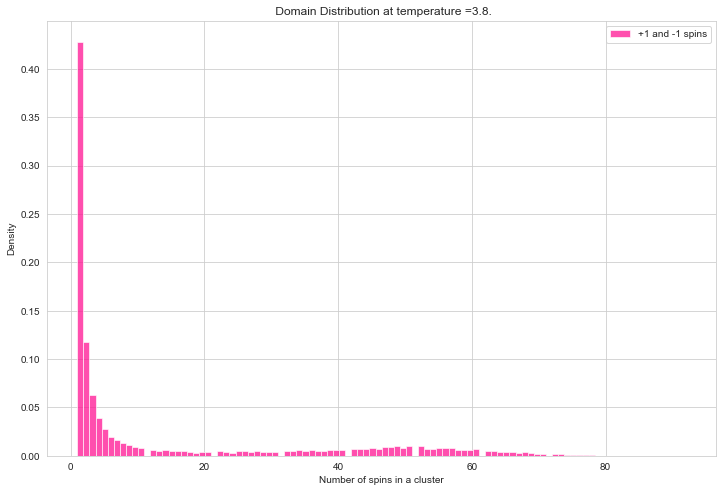

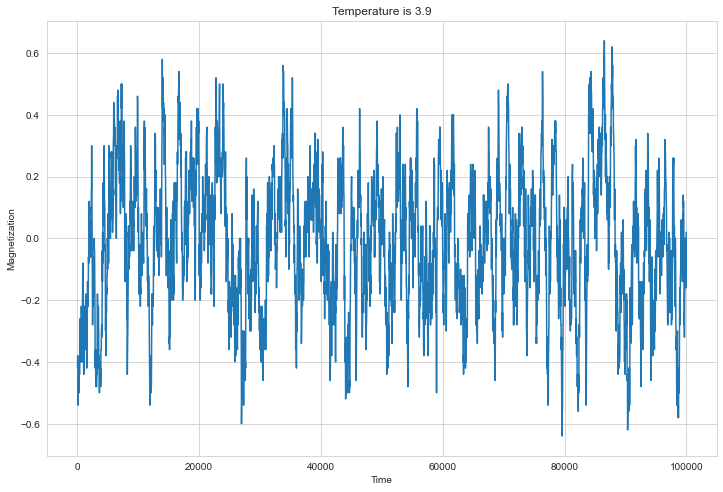

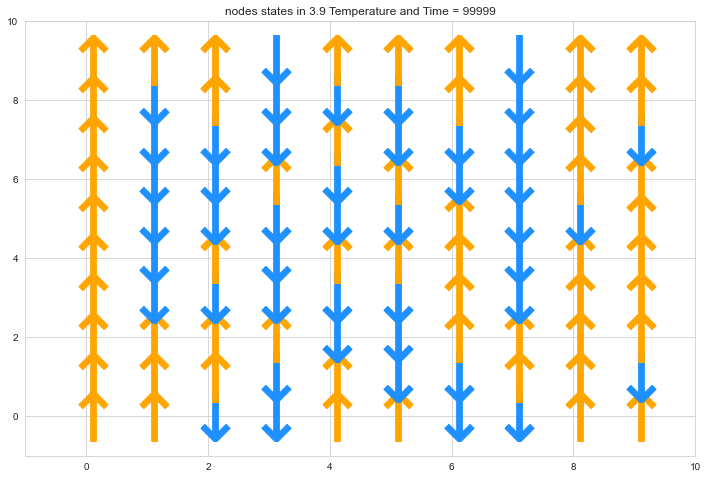

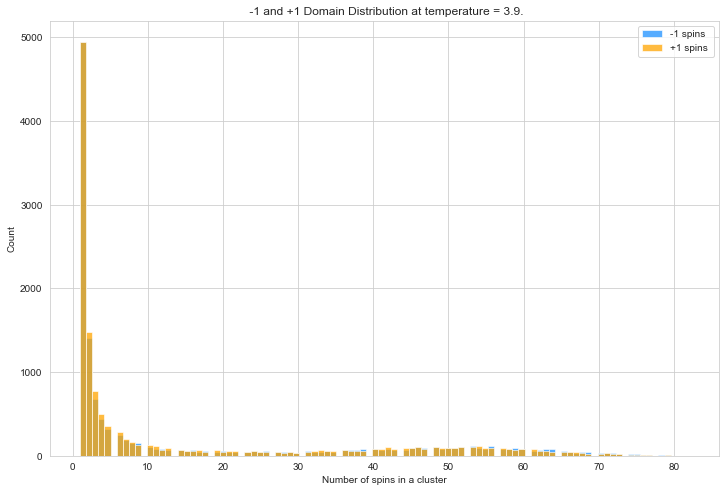

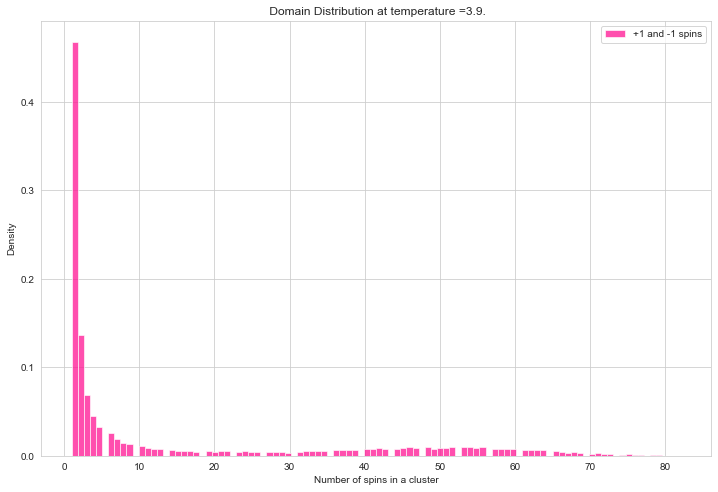

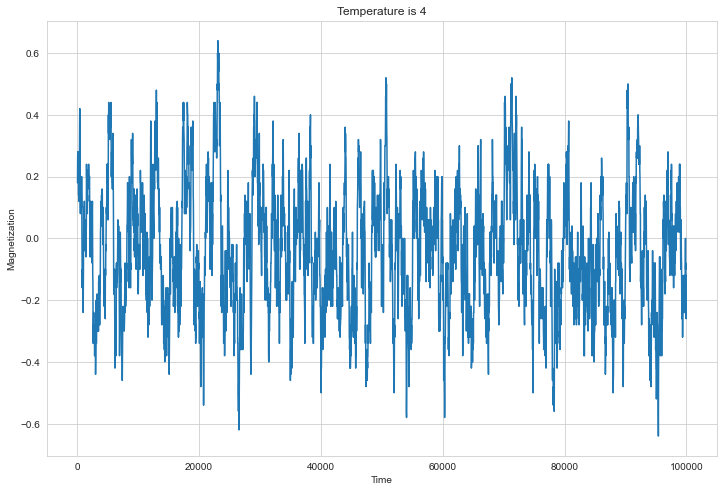

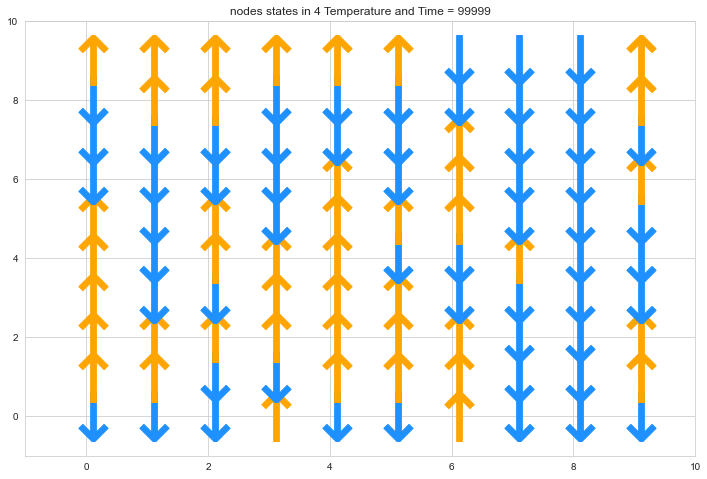

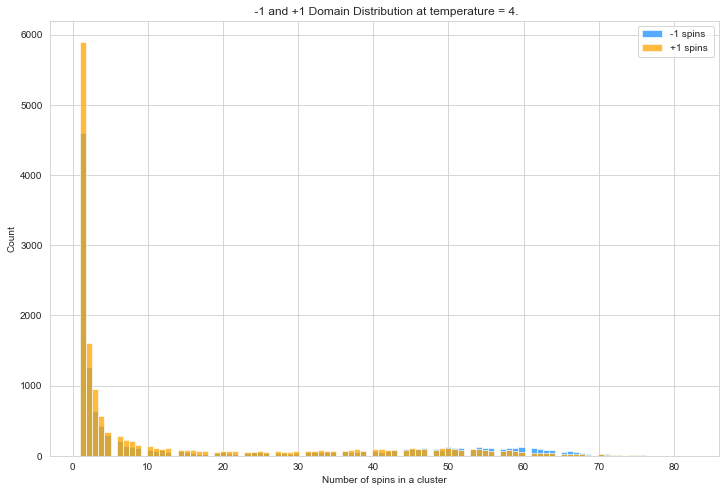

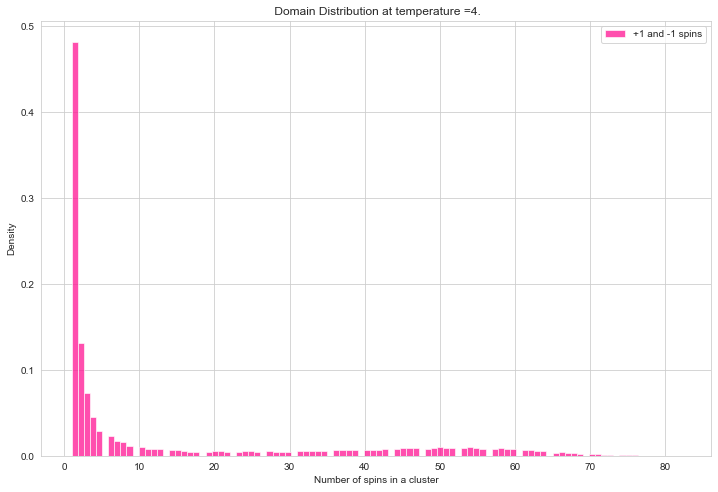

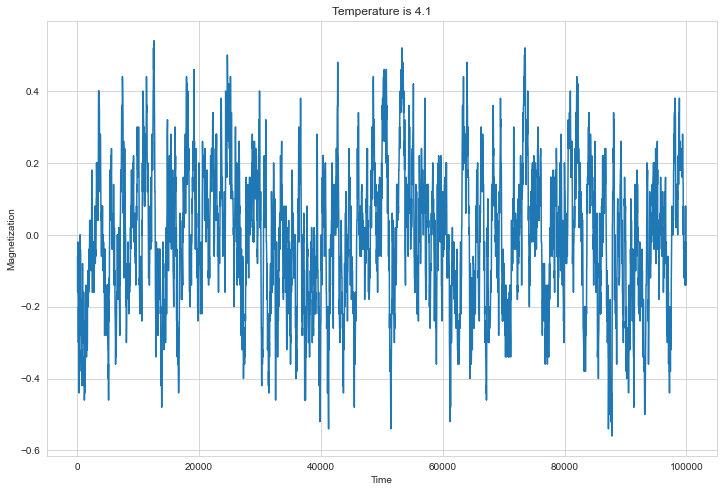

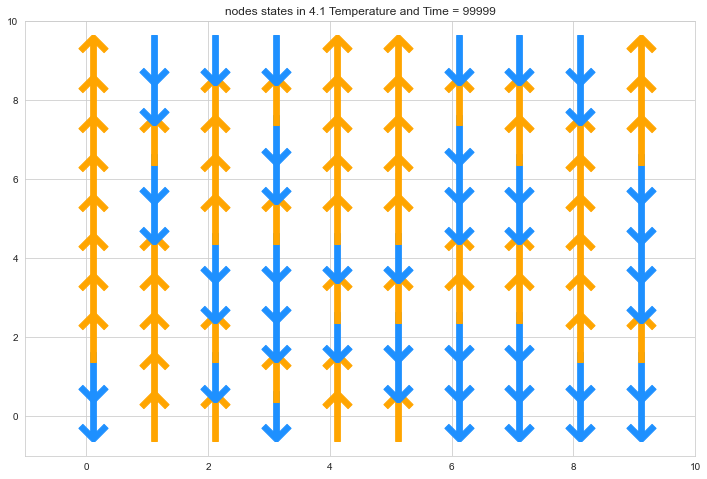

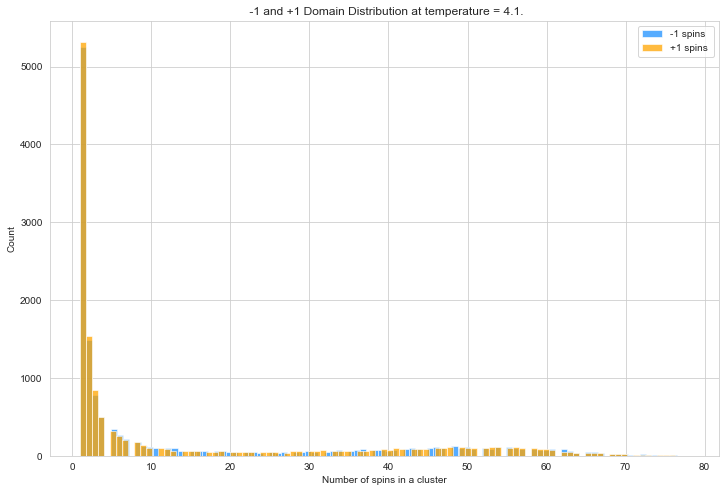

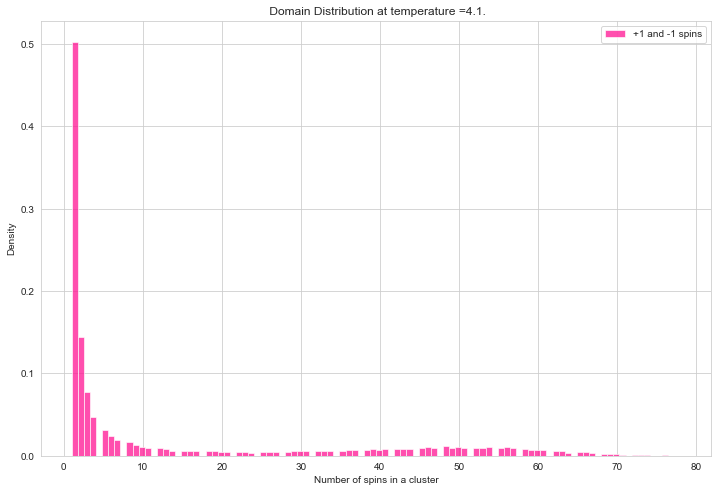

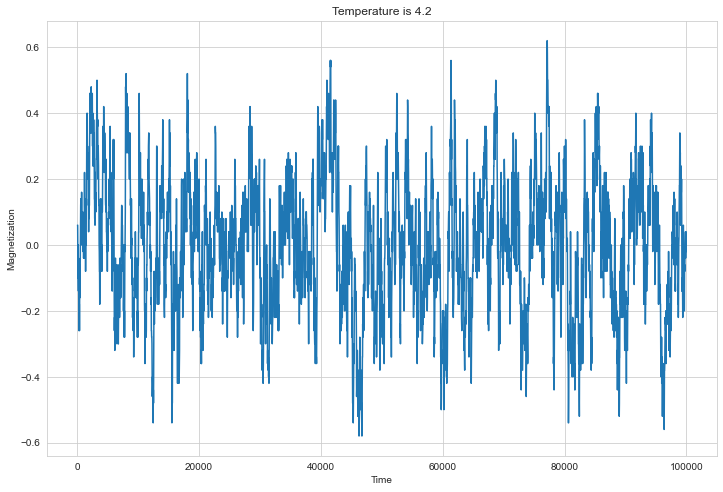

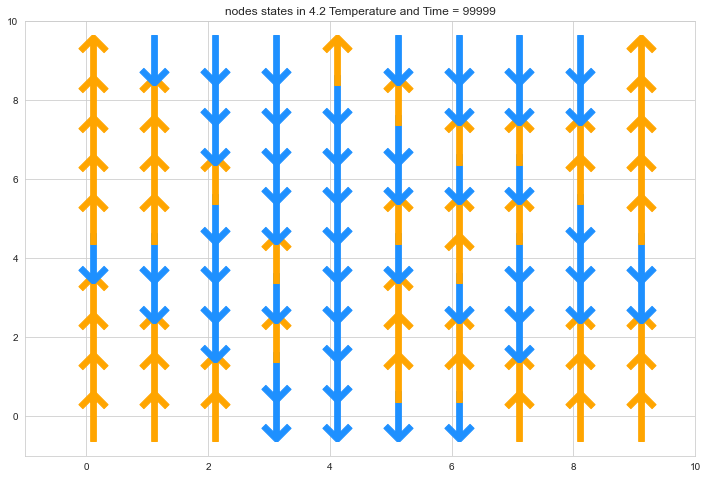

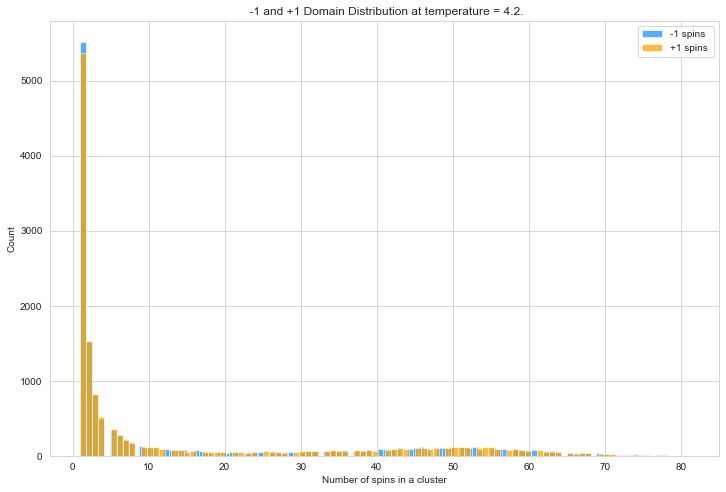

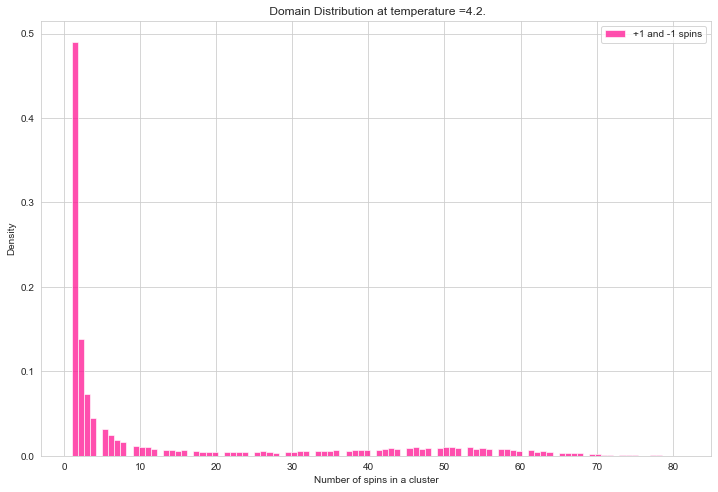

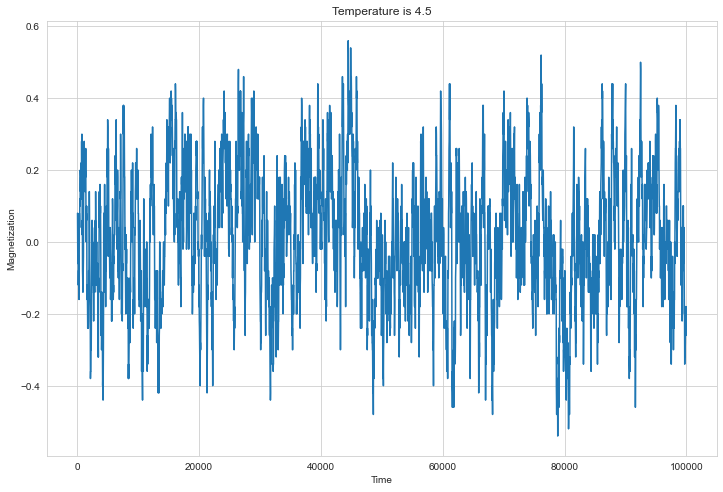

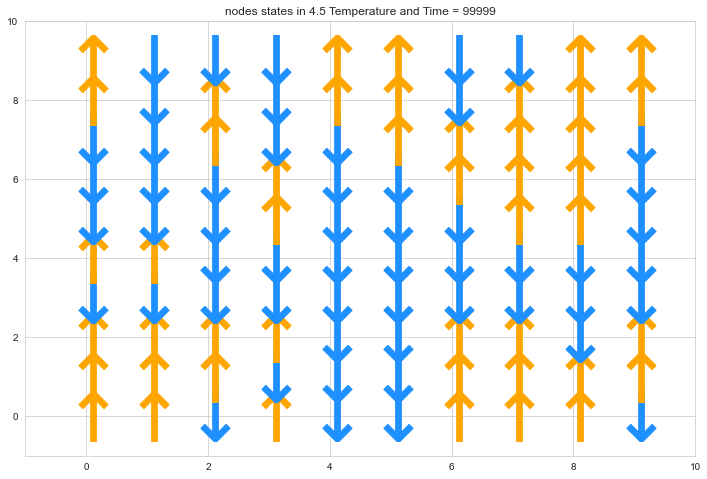

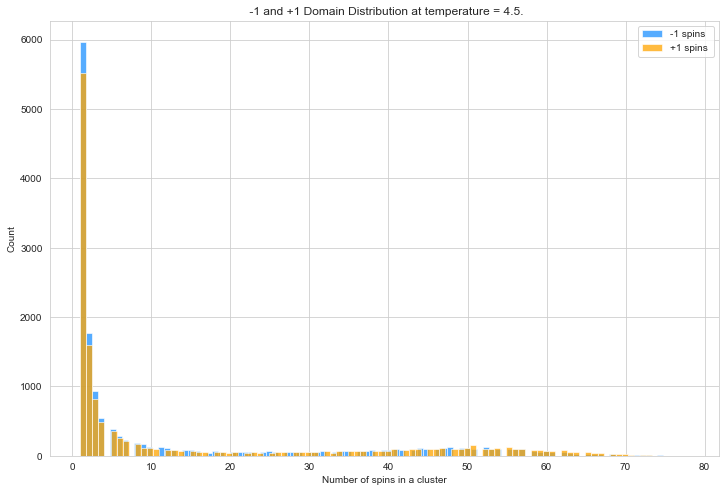

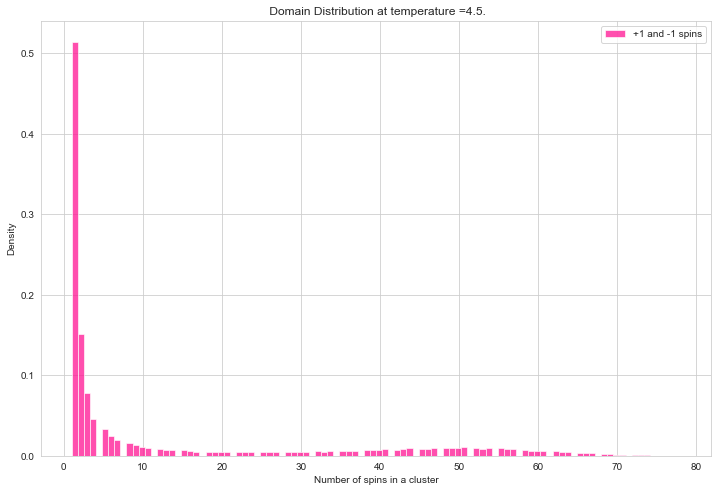

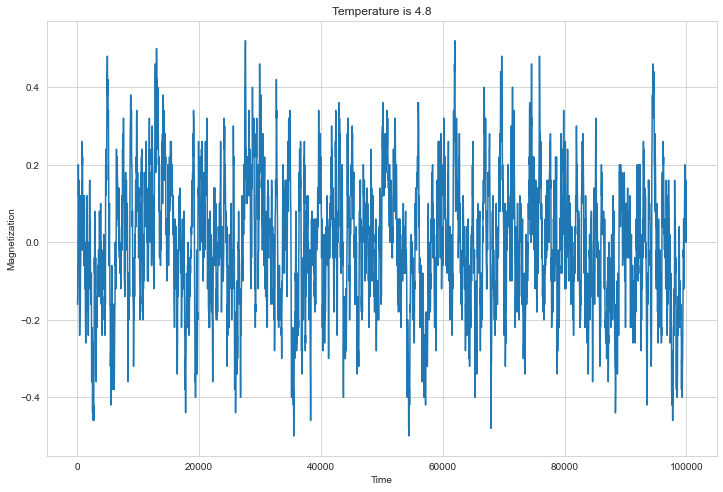

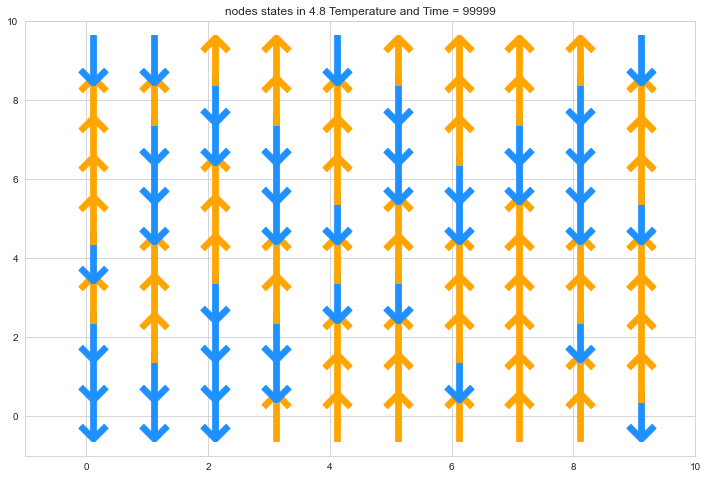

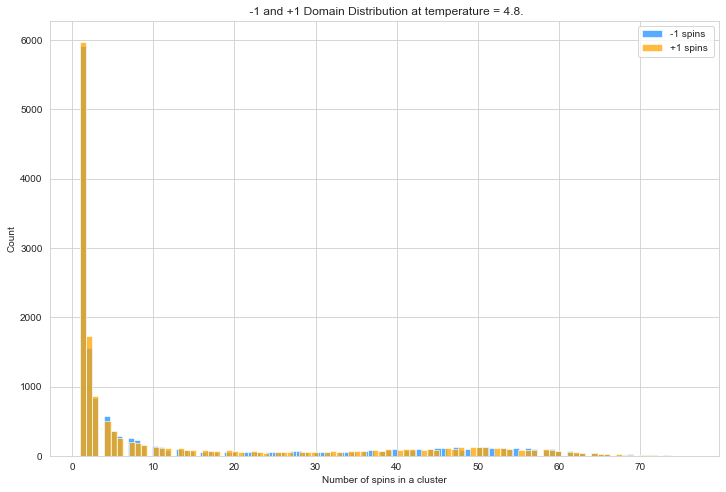

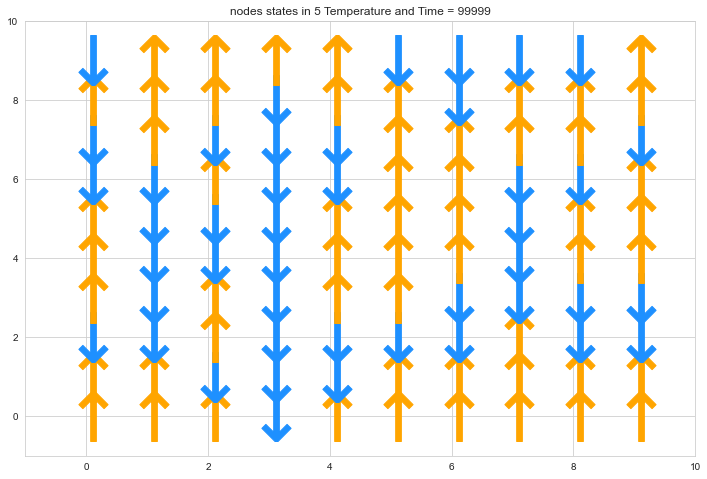

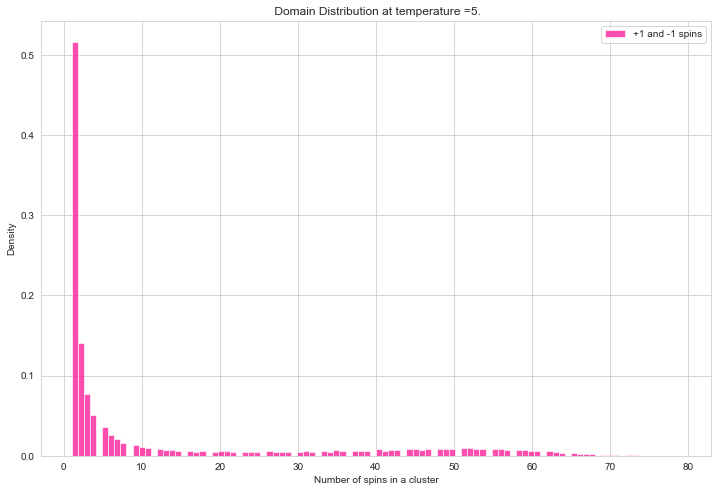

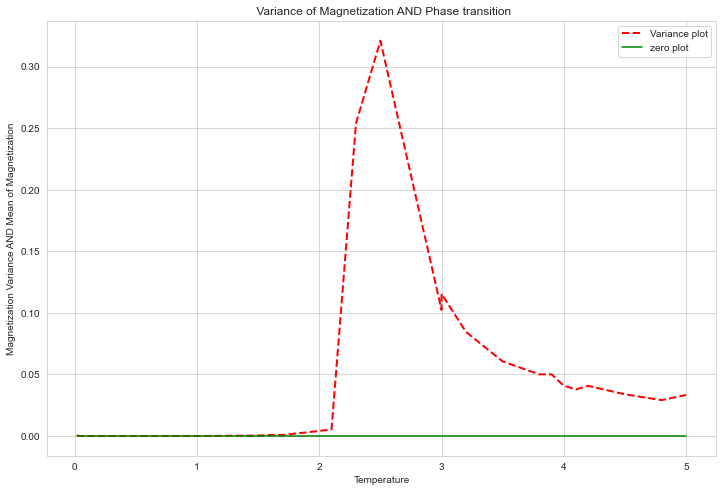

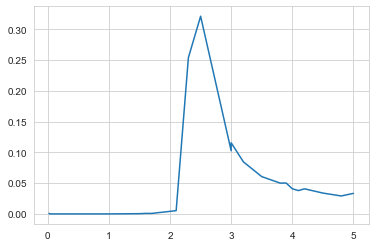

<Figure size 864x576 with 0 Axes>

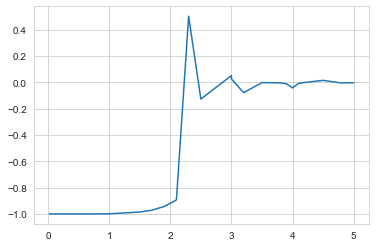

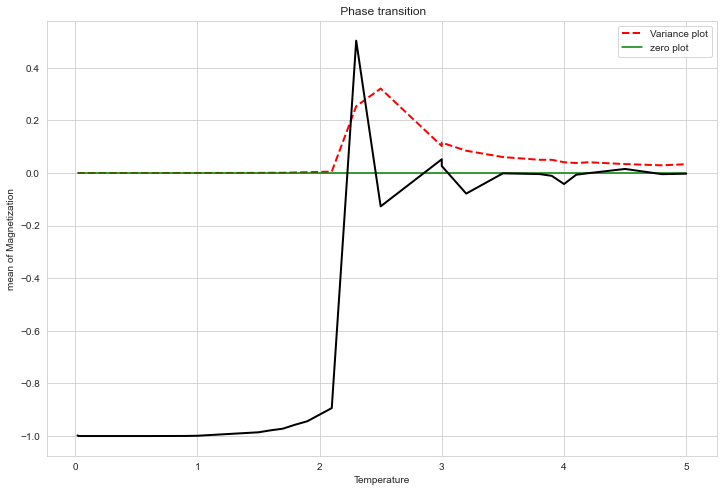

In [8]:

J = 1

S = np.zeros((N,N))
#print(S)
#initializing State Matrix of nodes
for i in range(N):
    for j in range(N):
        if random.rand()< 0.5 :
            S[i,j] = 1
        else:
            S[i,j] = -1



m = []
M = []
variance_m = []
I = Ising(S)
    
            
#EMPERATURE = [0.02, 0.03 ,0.04 ,0.05 ,0.06,0.1 ,0.2 ,0.3 ,0.5 ,0.6 ,0.9 ,1 ,1.5 ,1.6 ,1.7 ,1.8 ,1.9  ,2.1 ,2.3 ,2.5 ,3 ,3.5 ,4 ,4.5,5 ,5.2, 5.7,6 ,6.2 ,6.5 ,6.8, 7 ,8.8 ,9,10.5 ,11,12.5,13,15]

#EMPERATURE =[0.02, 0.03 ,0.6,1, 1.5, 2, 2.1 ,2.2, 2.5, 2.8,3 , 3.5]
#TEMPERATURE=[0.02, 0.03 ,0.04 ,0.05 ,0.06 ,0.1 ,0.2 ,0.3 ,0.5 ,0.6 ,0.9 ,1 ,1.5 ,1.6 ,1.7 ,1.8 ,1.9  ,2.1 ,2.3 ,2.5 ,3 ,3.5 ,4 ,4.5,5 ,5.2, 5.7,6 ,6.2 ,6.5 ,6.8, 7 ,8.8 ,9,10.5 ,11,12.5,13,15]


#TEMPERATURE=[0.02, 0.03 ,0.04 ,0.05 ,0.06 ,0.1 ,0.2 ,0.3 ,0.5 ,0.6 ,0.9 ,1 ,1.5 ,1.6 ,1.7 ,1.8 ,1.9  ,2.1 ,2.3 ,2.5 ,3 ,3.5 ,4 ,4.5,5 ,5.2, 5.7, 6 ,6.2 ,6.5 ,6.8, 7 ]

TEMPERATURE=[0.02, 0.03 ,0.04 ,0.05 ,0.06 ,0.1 ,0.2 ,0.3 ,0.5 ,0.6 ,0.9 ,1 ,1.5 ,1.6 ,1.7 ,1.8 ,1.9  ,2.1 ,2.3 ,2.5 ,3 ,3,3.2,3.5,3.8,3.9,4,4.1,4.2,4.5,4.8,5 ]


#TIME=1000
TIME = 100000


m_timestep = list( range(int((N*N/4)) ,TIME,  int((N*N)/4)) )




for temp in TEMPERATURE:
       # m is the avarage of magnitization over time, in fixed temperature
        m = []
        Domain_sizes =[]
        D1=[]
        D2=[]

        for time in range(TIME):

                    I = Ising(S)

                    i = random.randint(N)
                    j = random.randint(N)

                    H1 = I.Hamiltonian_prime(S,i,j,J=1)

                    S[i,j] = - S[i,j]
                    #print("change state", i,j)

                    H2 = -H1

                    if H2 > H1 and  (random.rand() >  mt.exp(-((H2-H1)/temp))):
                            S[i,j] = - S[i,j]




                      # for any (N*N)/4 step of time :  
                    if time in m_timestep :

                              # Computing  mean of magnetization at time=
                             m.append ((S.sum()) / (N*N))


                    # Computing size of clusters (+1 and -1 spins at time= time, and fixed temprature =temp)
                             Domain_sizes  = Domain_sizes  + I.DomSize(S, -1 ) + I.DomSize(S, 1 )
                             D1 = D1 + I.DomSize(S, -1 ) 
                             D2 = D2 + I.DomSize(S, 1 )
                             
                             
                             
                             
                             
                             #I.PLOTTING_states (S,temp,time)
        
        I.PLOTTING_mag_temp (m_timestep,m,temp)

        
        
        I.PLOTTING_states (S,temp,time)


        variance_m.append (((((np.array(m))**2).sum()) / len(m)) - ((np.array(m)).sum()/ (len(m)))**2)
        M.append((np.array(m).sum())/ len(m) )


        I.Plot_Dist_DomainSize( D1,D2,Domain_sizes,temp,N)

        
        
        
        
        
        
plt.figure(figsize=(12, 8)) 

I.PLOTTING_variance (TEMPERATURE,variance_m)
plt.plot(TEMPERATURE,variance_m)


plt.figure(figsize=(12, 8)) 
I.PLOTTING_phase_transition(TEMPERATURE,M)


plt.plot(TEMPERATURE,M)

I.PLOTTING_PHASE_AND_VARIANCE(TEMPERATURE,variance_m, M)

